In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
dataTrain=pd.read_csv('train.csv')
dataTest=pd.read_csv('test.csv')
df= pd.concat([dataTrain, dataTest], axis=0, ignore_index=True)
df.shape

(234500, 20)

 Shape : (243599, 20)

In [ ]:
df=df.drop(['Name'],axis=1)

In [ ]:
df=df.drop(['id'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234500 entries, 0 to 234499
Data columns (total 18 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Gender                                 234500 non-null  object 
 1   Age                                    234500 non-null  float64
 2   City                                   234500 non-null  object 
 3   Working Professional or Student        234500 non-null  object 
 4   Profession                             173238 non-null  object 
 5   Academic Pressure                      46664 non-null   float64
 6   Work Pressure                          187804 non-null  float64
 7   CGPA                                   46664 non-null   float64
 8   Study Satisfaction                     46664 non-null   float64
 9   Job Satisfaction                       187816 non-null  float64
 10  Sleep Duration                         234500 non-null  

In [ ]:
objectDtype=df.select_dtypes(['object'])
ObjectColumn=objectDtype.columns
print("Non numercal'snumber :")
print(ObjectColumn)
print(len(ObjectColumn))

Non numercal'snumber :
Index(['Gender', 'City', 'Working Professional or Student', 'Profession',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')
9


In [ ]:
NumDtype=df.select_dtypes(['int64','float64'])
NumColumn=NumDtype.columns
print("Non numercal'snumber :")
print(NumColumn)
print(len(NumColumn))

Non numercal'snumber :
Index(['Age', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours',
       'Financial Stress', 'Depression'],
      dtype='object')
9


MISSING DATA¶

In [ ]:
df.isna().sum()/df.shape[0]*100

,0
Gender,0.000000
Age,0.000000
City,0.000000
Working Professional or Student,0.000000
Profession,26.124520
Academic Pressure,80.100640
Work Pressure,19.913006
CGPA,80.100640
Study Satisfaction,80.100640
Job Satisfaction,19.907889


<Axes: >

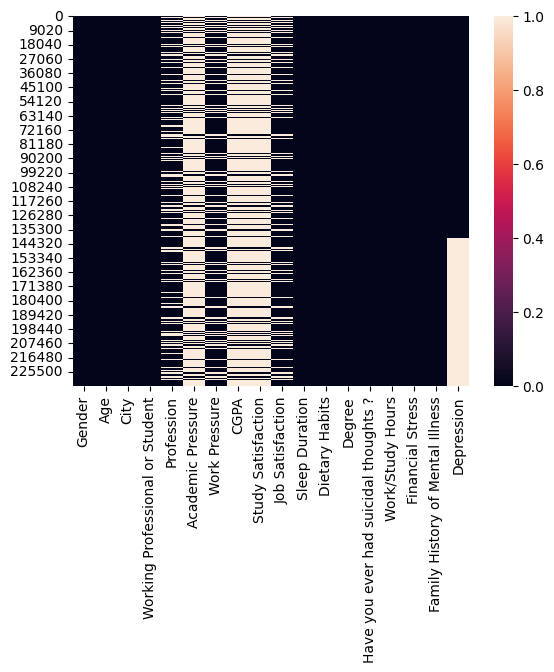

In [ ]:
sns.heatmap(df.isna())

Numerical value : ['Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction' 'Work/Study Hours' 'Financial Stress', 'Depression

No_numerical values : ['Gender', 'City', 'Working Professional or Student', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illnes

Column afaka foutrena : CGPA , Study Satisfaction , Academic Pressure s']']


In [ ]:
# Distinction of target and features
X=df.drop(['Depression'],axis=1)
y=df['Depression']

In [ ]:
# print all target unique values
y.unique()

array([ 0.,  1., nan])

All object values


In [ ]:
for col in ObjectColumn:
    unique_values = X[col].unique()
    value_counts = X[col].value_counts()
    print(f"Value counts in {col}:\n{value_counts}\n")

Value counts in Gender:
Gender
Male      128726
Female    105774
Name: count, dtype: int64

Value counts in City:
City
Kalyan         10978
Patna           9812
Vasai-Virar     9662
Kolkata         9415
Ahmedabad       9290
               ...  
Gaurav             1
Vaanya             1
Ivaan              1
Shrey              1
No.12              1
Name: count, Length: 124, dtype: int64

Value counts in Working Professional or Student:
Working Professional or Student
Working Professional    187827
Student                  46673
Name: count, dtype: int64

Value counts in Profession:
Profession
Teacher           41291
Content Writer    13001
Architect          7352
Consultant         7149
HR Manager         6623
                  ...  
City Manager          1
FamilyVirar           1
B.Com                 1
BE                    1
M.Pharm               1
Name: count, Length: 81, dtype: int64

Value counts in Sleep Duration:
Sleep Duration
Less than 5 hours                      64445
7-8 ho

Distribution


In [ ]:
#Select numerical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_features:
    #watching unique values
    unique_values = X[col].unique()
    print(f"Unique values in {col}: {unique_values}")

Unique values in Age: [49.   26.   33.   22.   30.   59.   47.   38.   24.   42.   55.   51.
 39.   29.   50.   23.   56.   45.   37.   46.   31.   19.   28.   25.
 41.   60.   18.   36.   21.   58.   44.   43.   40.   35.   54.   27.
 52.   48.   57.   53.   34.   20.   32.   32.08]
Unique values in Academic Pressure: [nan  5.  2.  3.  4.  1.]
Unique values in Work Pressure: [ 5.  4. nan  1.  2.  3.]
Unique values in CGPA: [    nan  8.97    5.9     7.03    5.59    8.13    5.7     9.54    8.04
  9.79    8.38    6.1     7.04    8.52    5.64    8.58    6.51    7.25
  7.83    9.93    8.74    6.73    5.57    8.59    7.1     6.08    5.74
  9.86    6.7     6.21    5.87    6.37    9.72    5.88    9.56    6.99
  5.24    9.21    7.85    6.95    5.86    7.92    9.66    8.94    9.71
  7.87    5.6     7.9     5.46    6.79    8.7     7.38    8.5     7.09
  9.82    8.89    7.94    9.11    6.75    7.53    9.49    9.01    7.64
  5.27    6.      9.44    5.75    7.51    9.05    6.38    8.95    9.88
  5.

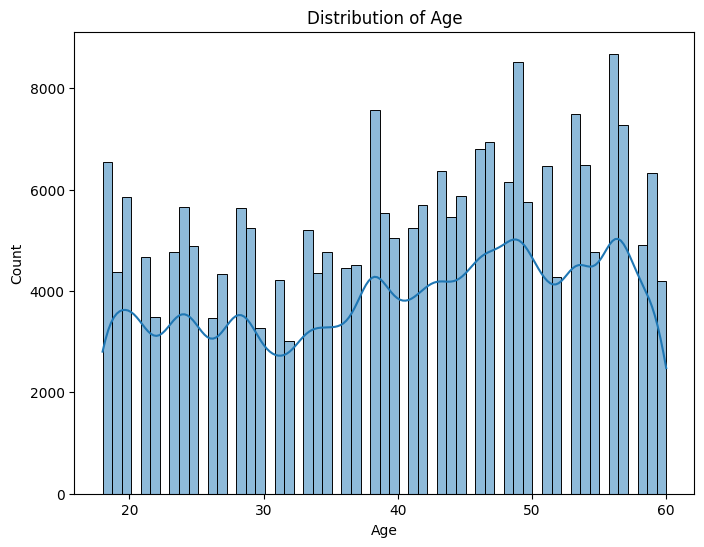

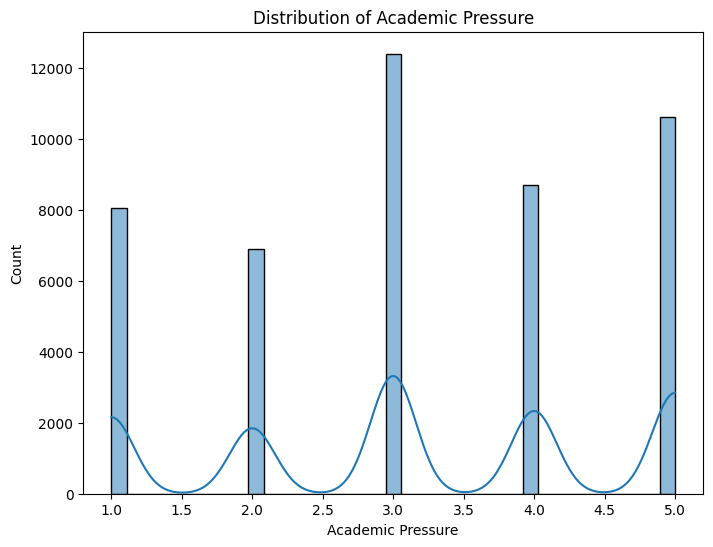

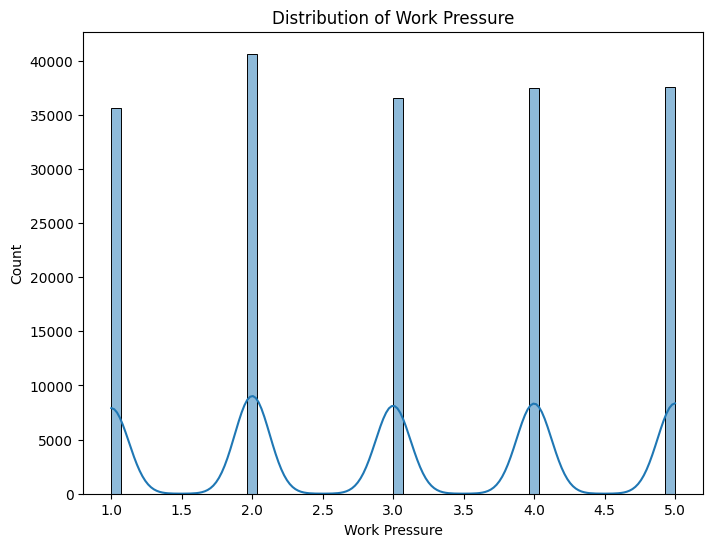

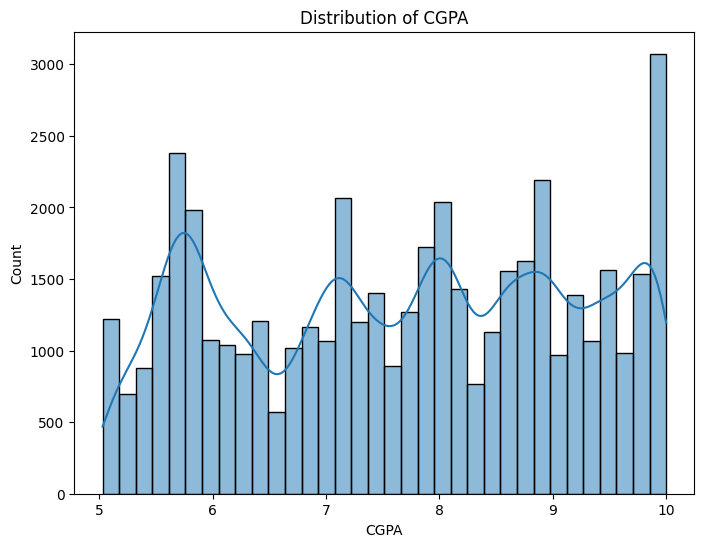

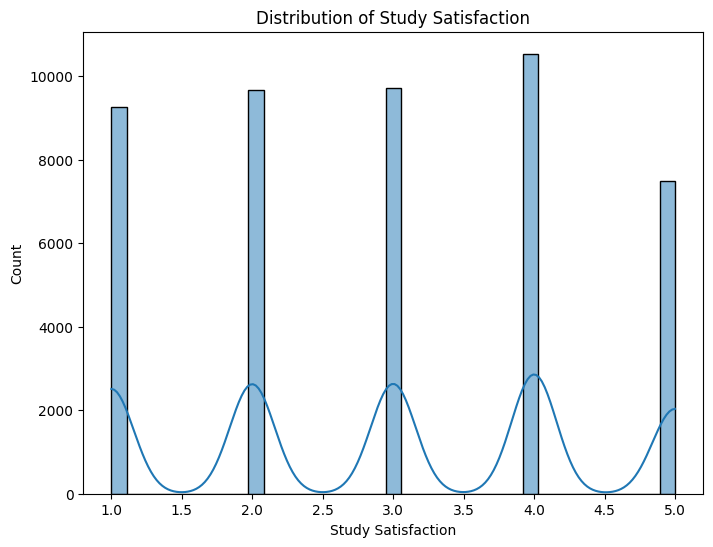

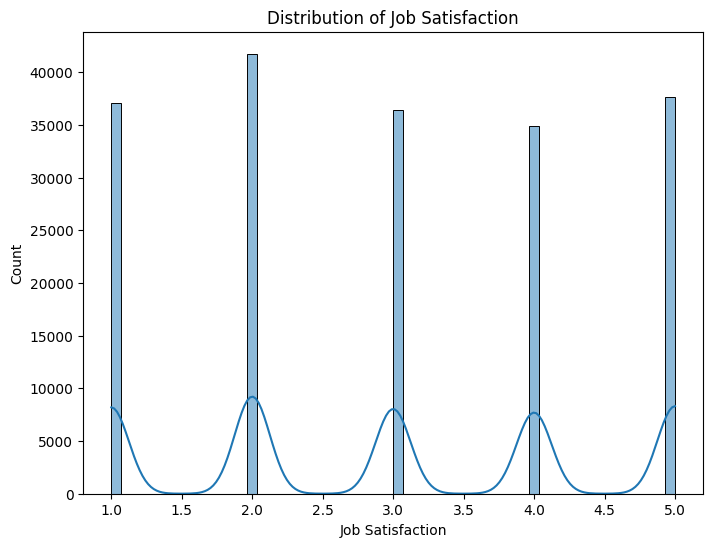

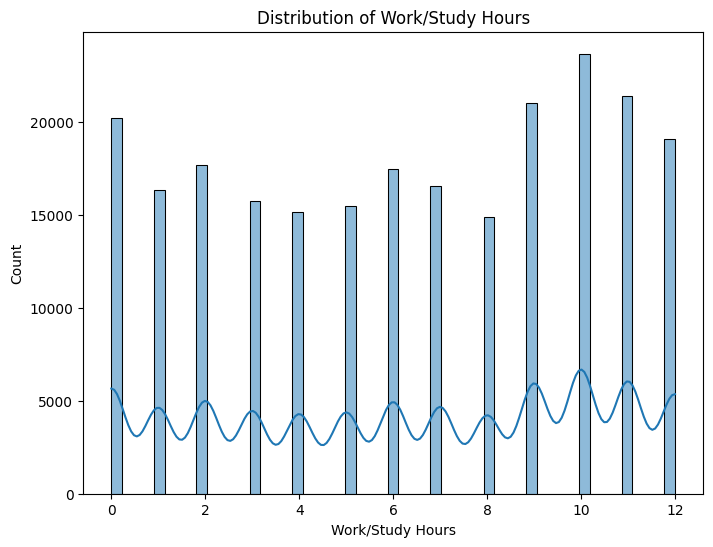

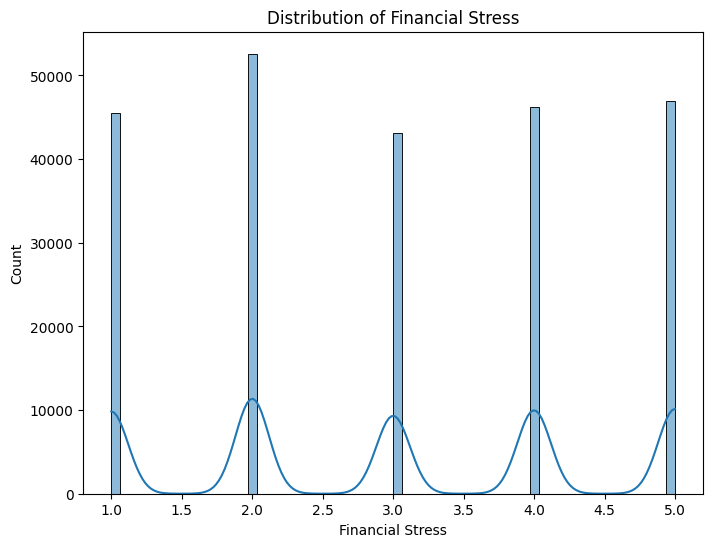

In [ ]:
# distribution of column age
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='Age',kde=True)
plt.title('Distribution of Age')
plt.show()
# distribution of other numerical column
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='Academic Pressure',kde=True)
plt.title('Distribution of Academic Pressure')
plt.show()
# distribution of other numerical column
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='Work Pressure',kde=True)
plt.title('Distribution of Work Pressure')
plt.show()
# distribution of other numerical column
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='CGPA',kde=True)
plt.title('Distribution of CGPA')
plt.show()
# distribution of other numerical column
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='Study Satisfaction',kde=True)
plt.title('Distribution of Study Satisfaction')
plt.show()
# distribution of other numerical column
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='Job Satisfaction',kde=True)
plt.title('Distribution of Job Satisfaction')
plt.show()
# distribution of other numerical column
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='Work/Study Hours',kde=True)
plt.title('Distribution of Work/Study Hours')
plt.show()
# distribution of other numerical column
plt.figure(figsize=(8, 6))
sns.histplot(data=df,x='Financial Stress',kde=True)
plt.title('Distribution of Financial Stress')
plt.show()


TSy homogene tsy normaliser misy sous population maromaro
tsy homogene



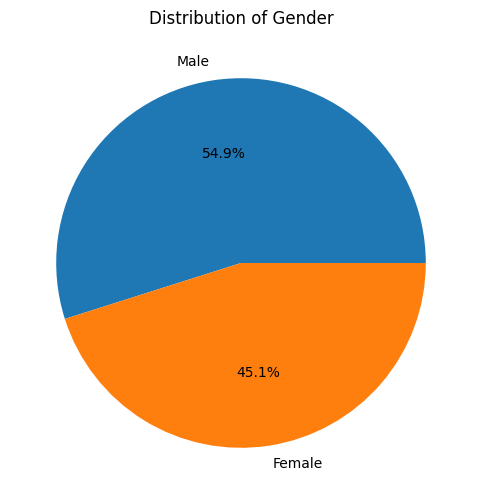

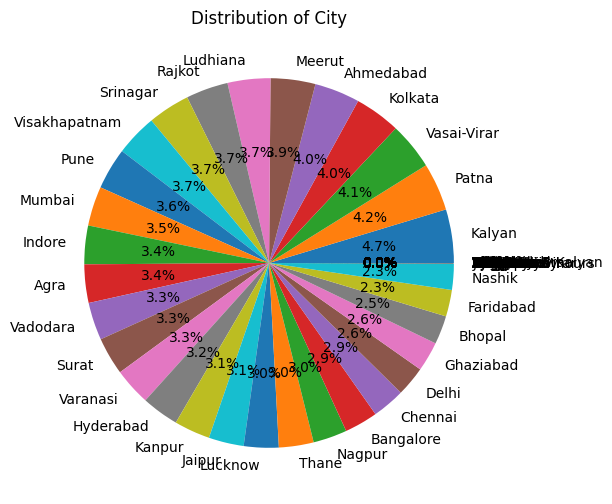

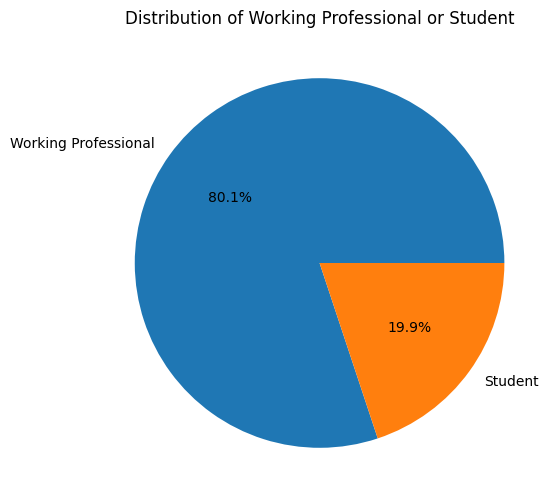

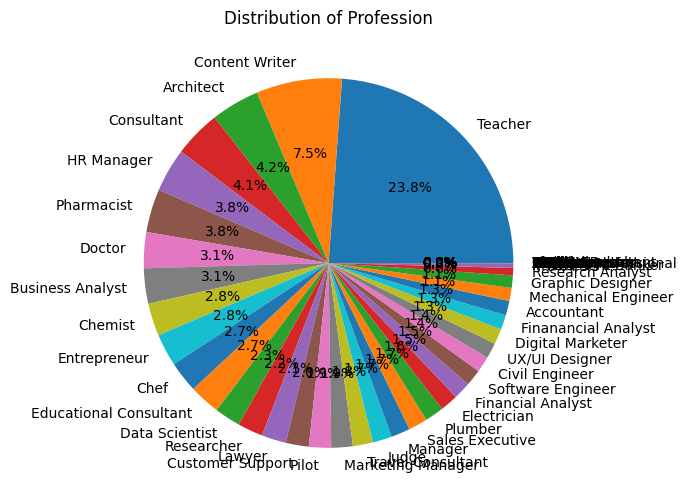

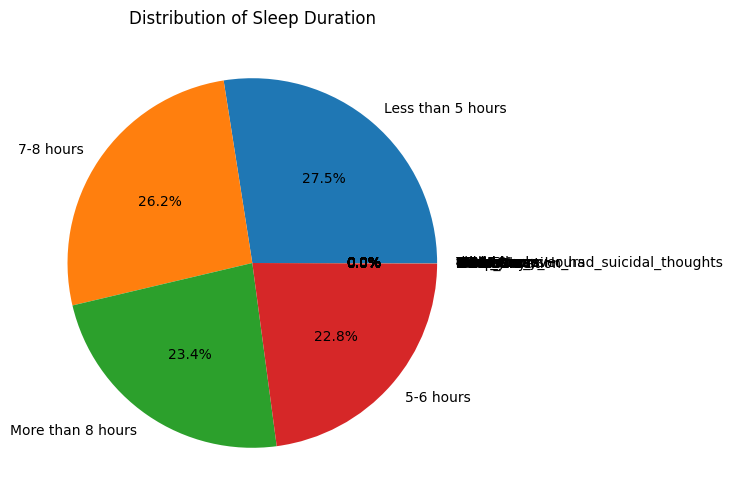

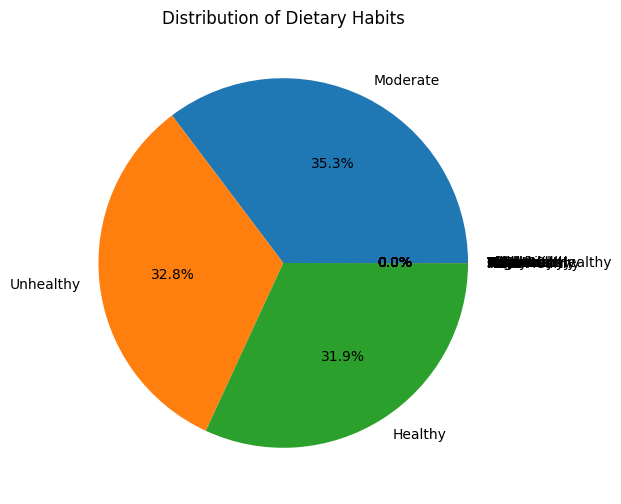

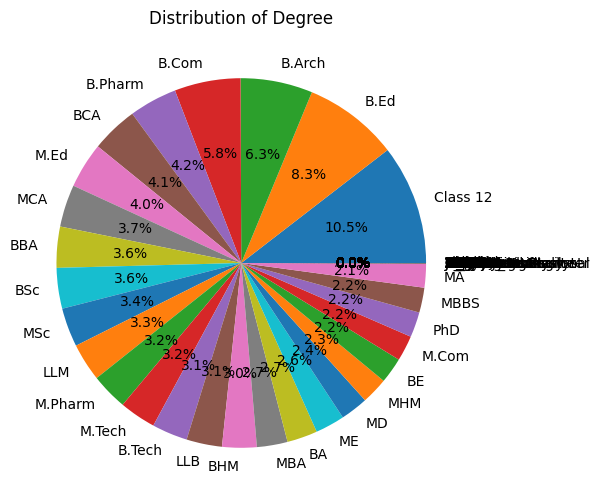

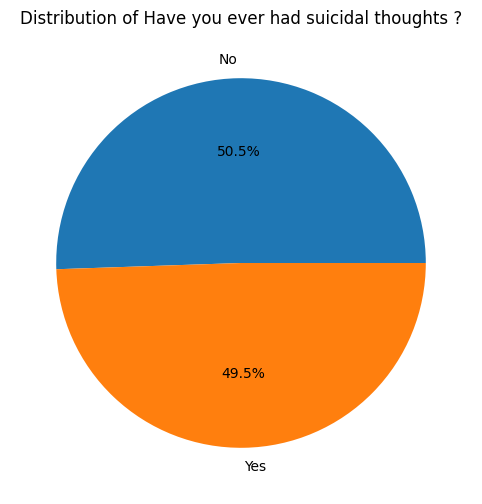

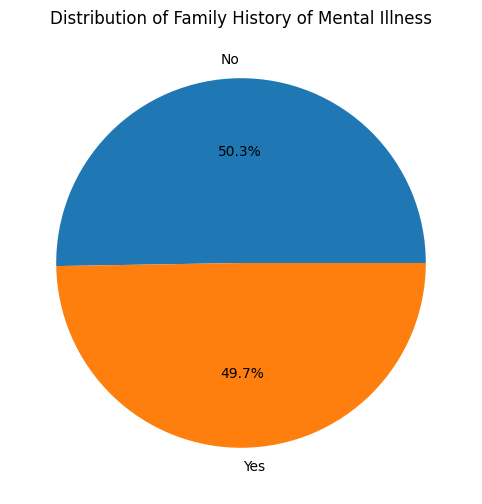

Text(0.5, 1.0, 'Distribution of Depression')

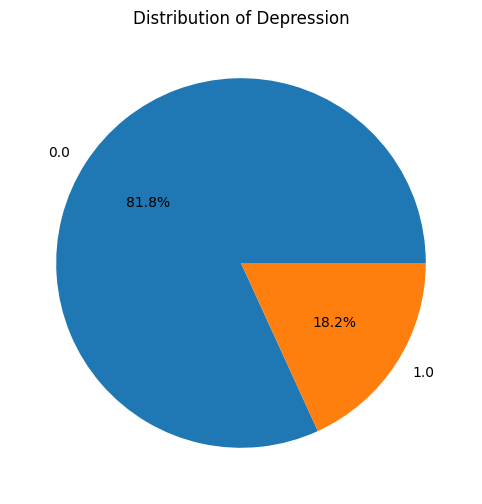

In [ ]:
# piechart of object column
for col in ObjectColumn:
    value_counts = X[col].value_counts()
    plt.figure(figsize=(8, 6))
    plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    plt.title(f'Distribution of {col}')
    plt.show()
#pie chart of target values
value_counts = y.value_counts()
plt.figure(figsize=(8, 6))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.title(f'Distribution of Depression')

Non balanced dataset
Betsaka mpiasa nohon'ny mpianatra , betsaka olona lehibe
Somary maromaro ny lehilahy

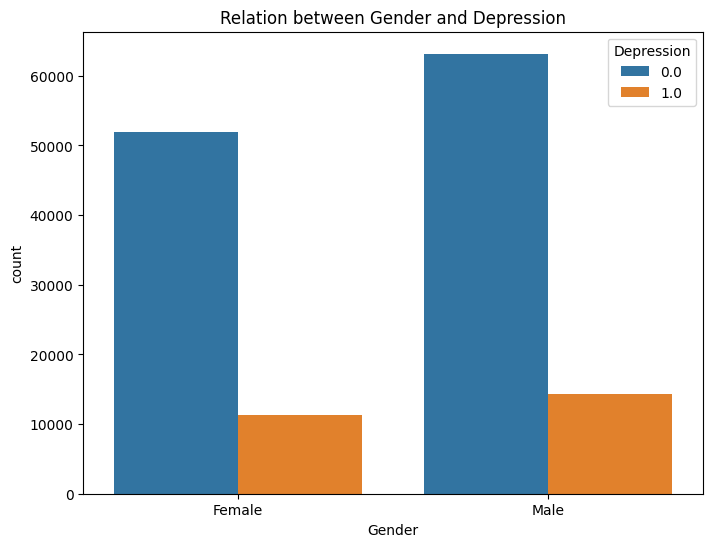

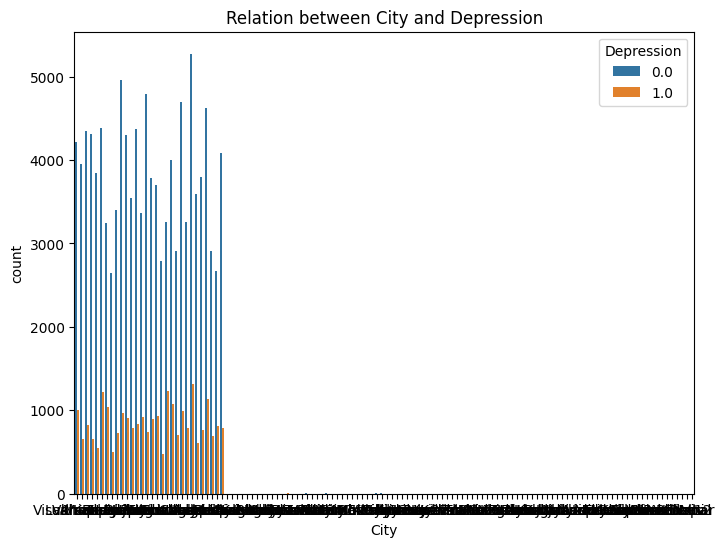

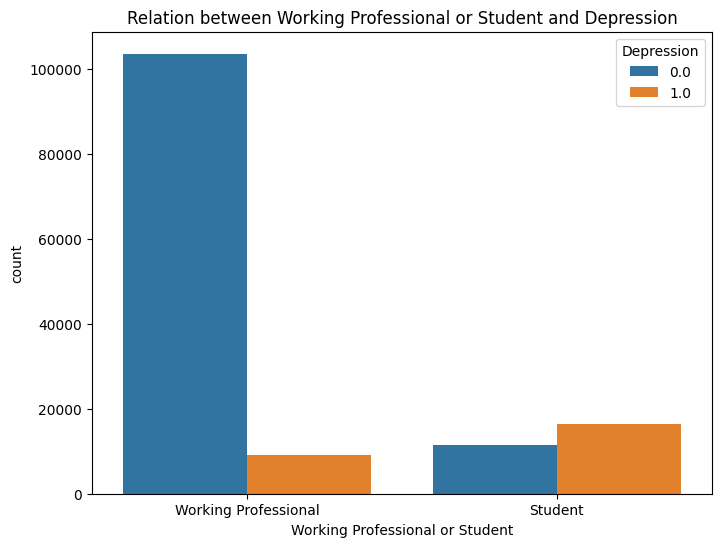

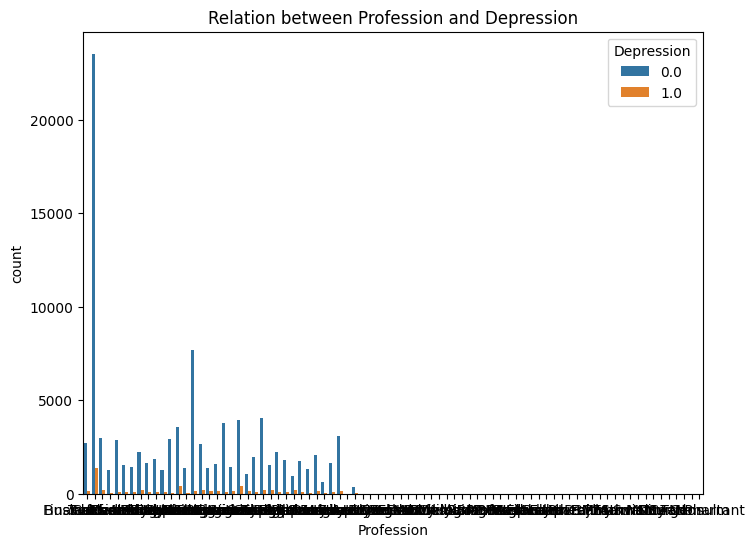

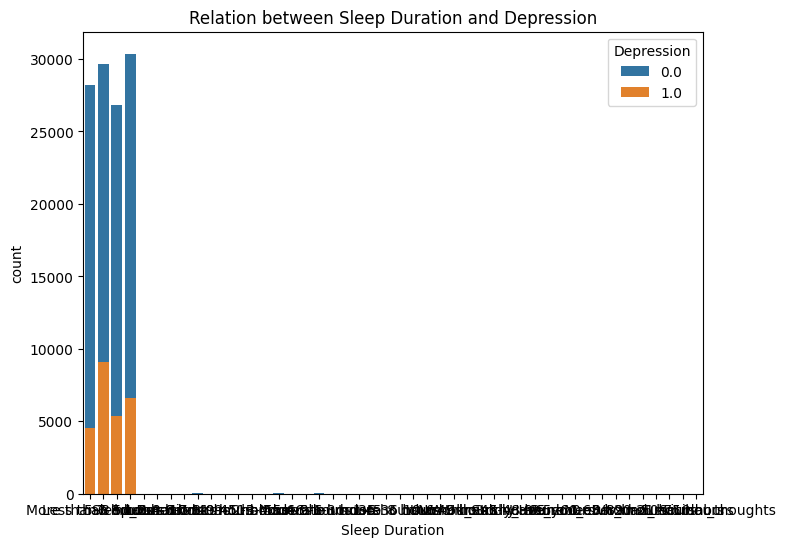

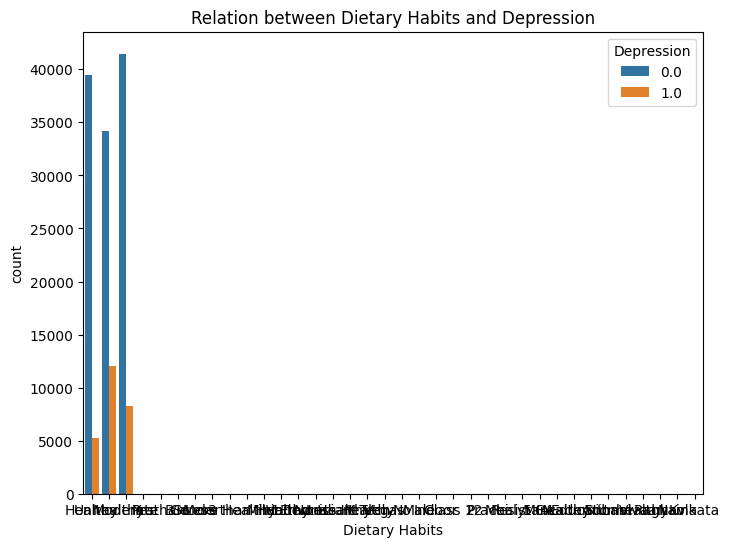

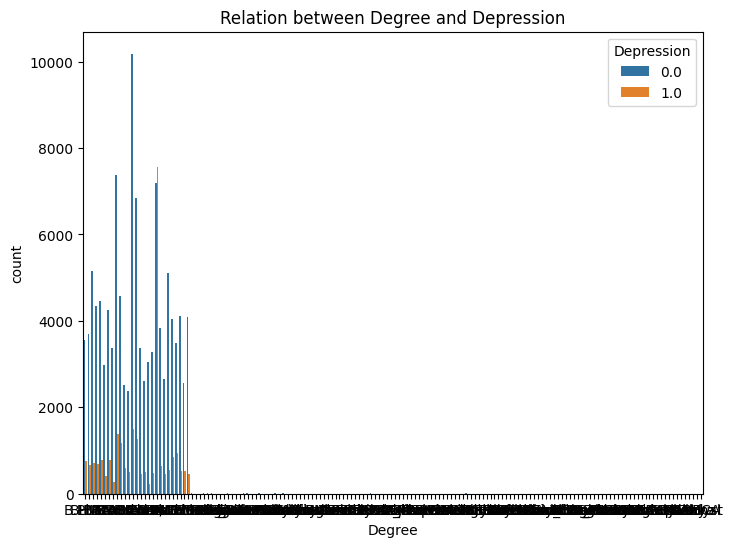

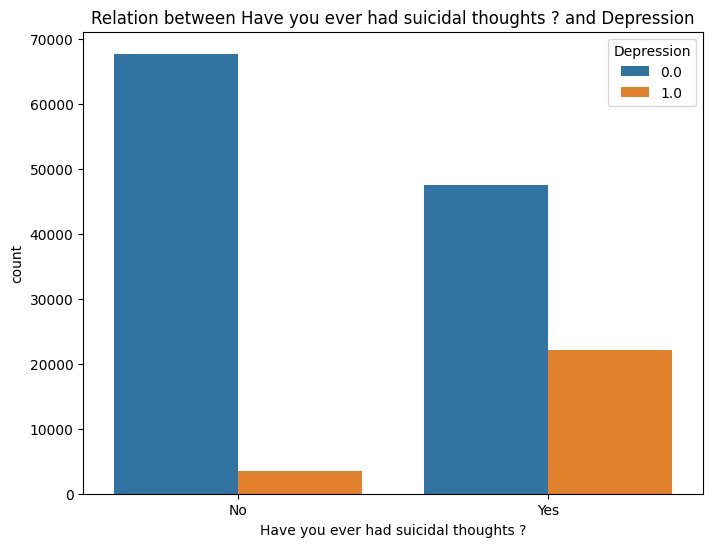

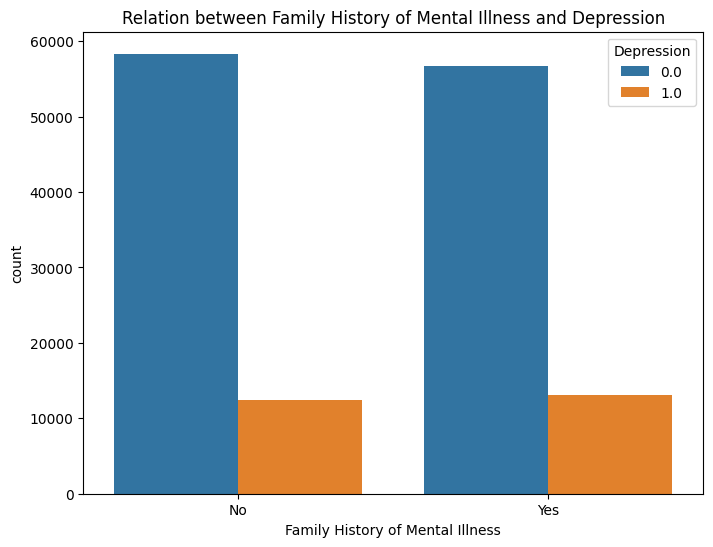

In [ ]:
# relation between object column and target
for col in ObjectColumn:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=col, hue='Depression')
    plt.title(f'Relation between {col} and Depression')
    plt.show()

Tsy dia misy fiatraikany ankoatrany ny hoe maro nyu mpianatra midepra, sy ny eo @ Have you ever had suicidal thoughts


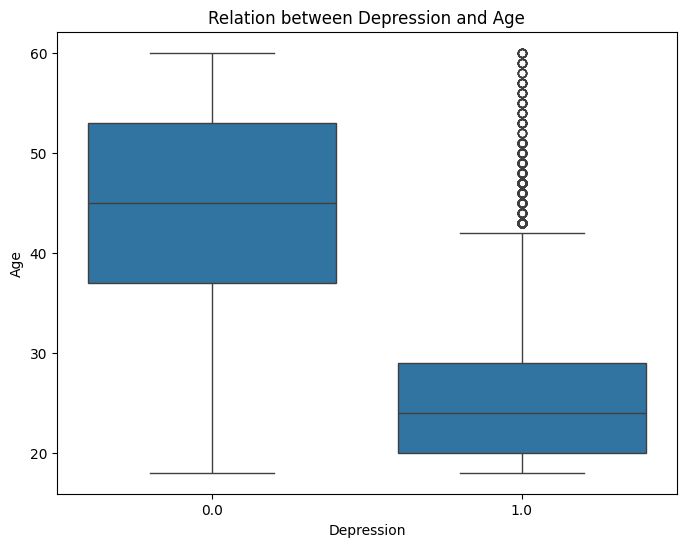

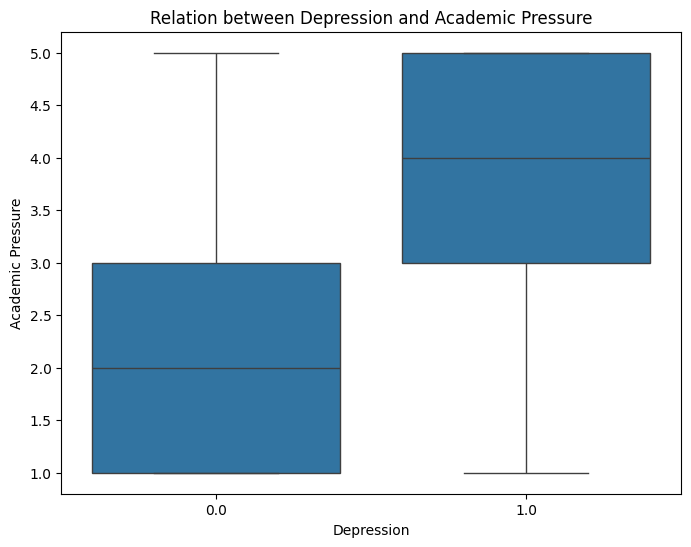

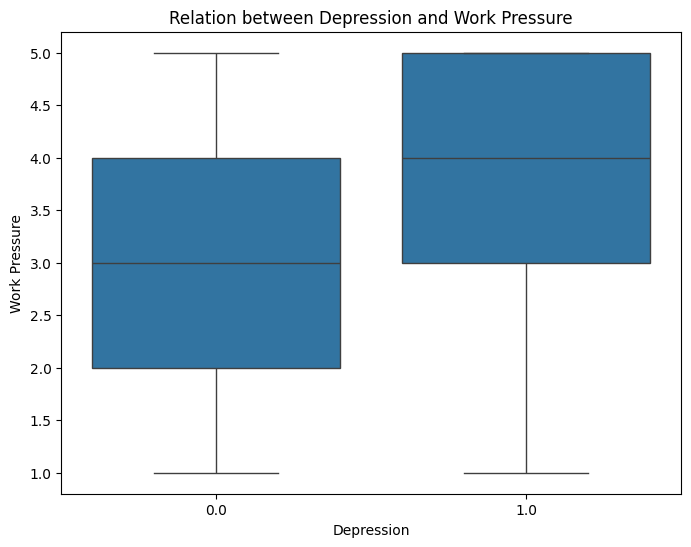

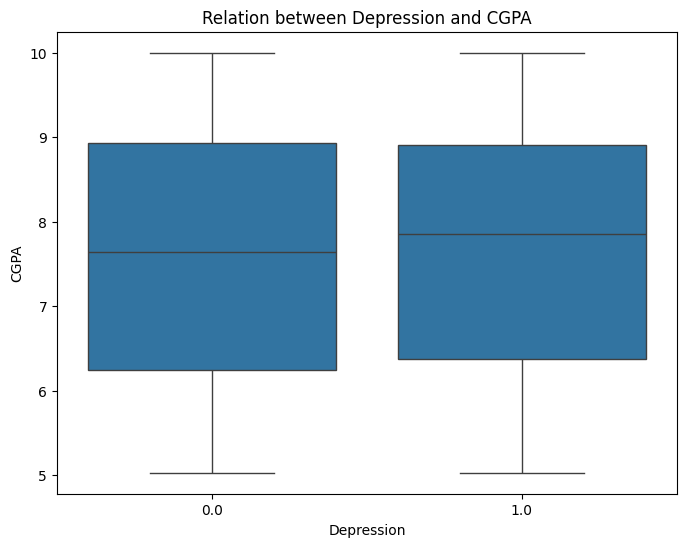

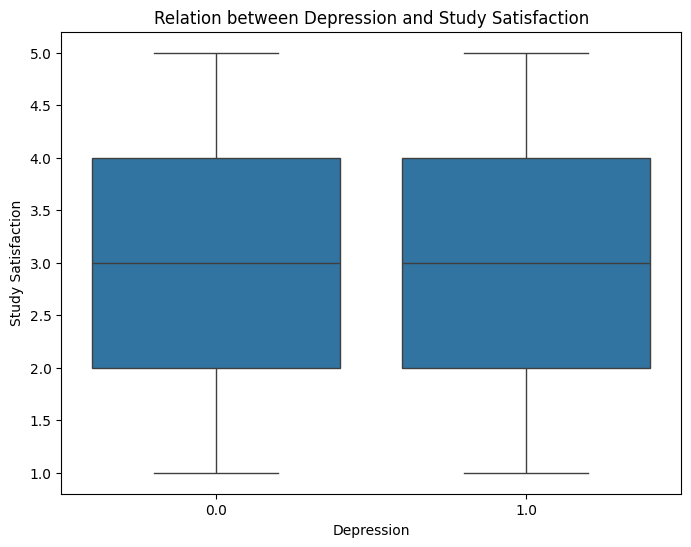

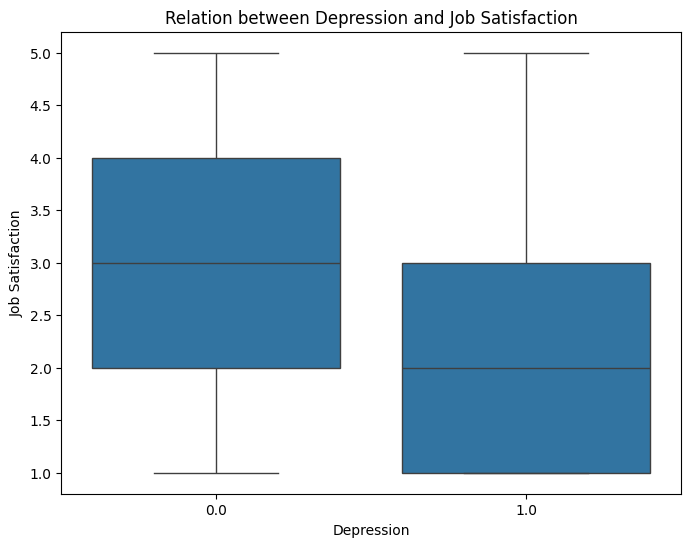

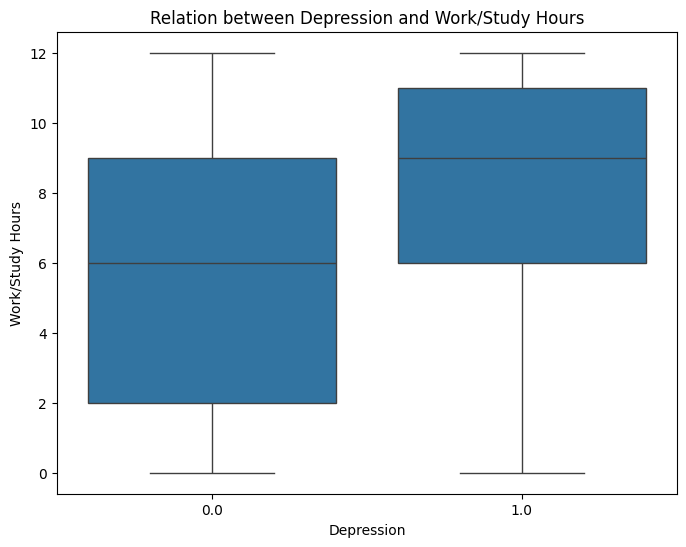

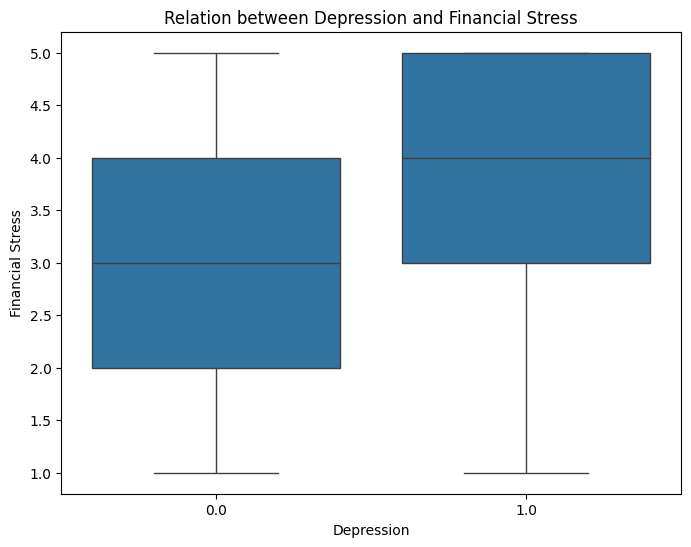

In [ ]:
# relation between numerical column and target
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='Depression', y=col)
    plt.title(f'Relation between Depression and {col}')
    plt.show()

Manamafy hatrany fa tsy quoi raha foutrena le study satisfaction sy CGPA
Ny ankotrzay misy relation tsara sy mipetraka tsara ny features sy target

<Axes: xlabel='Age', ylabel='Count'>

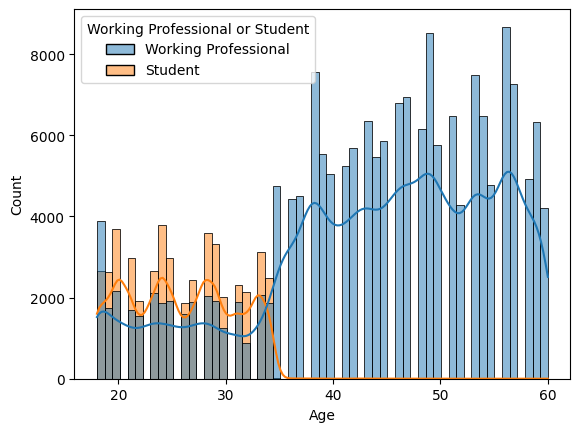

In [ ]:
# relation between Age and
sns.histplot(data=df,x='Age',hue='Working Professional or Student',kde=True)

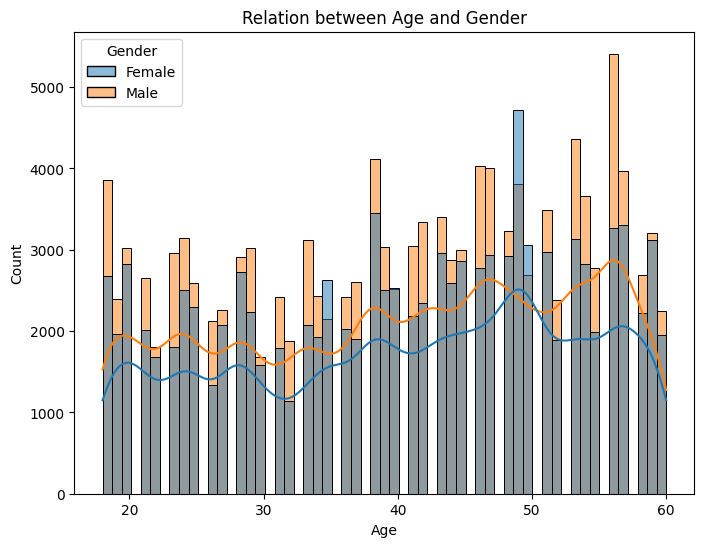

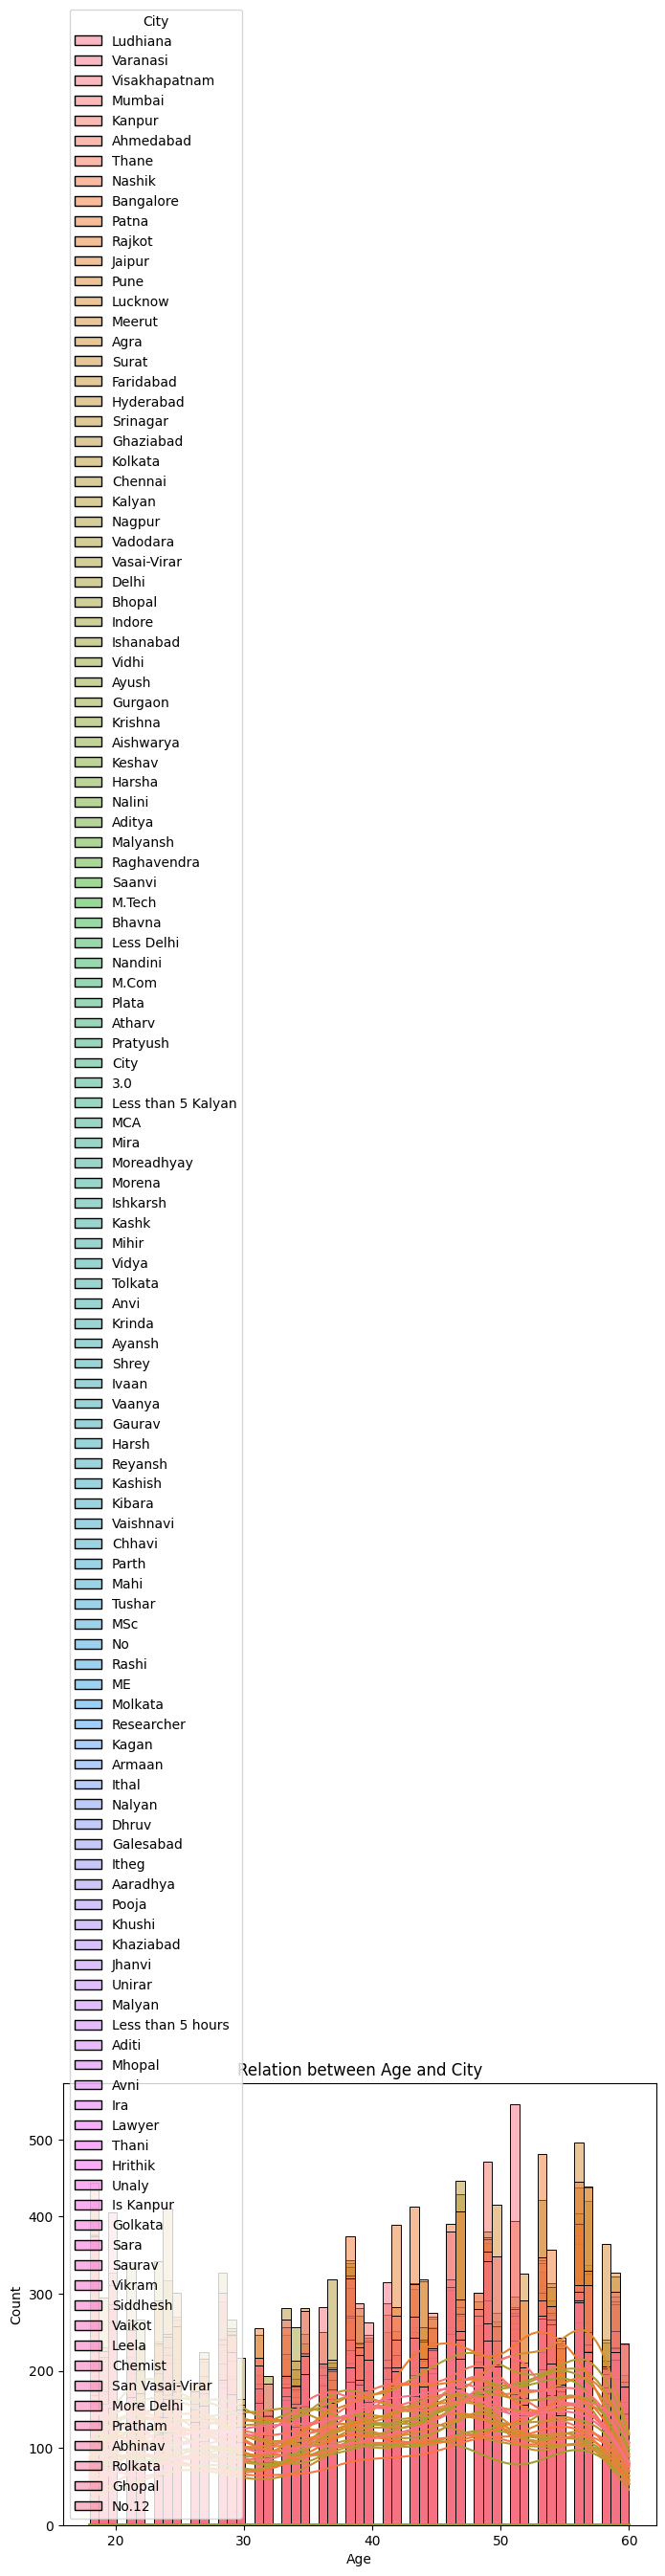

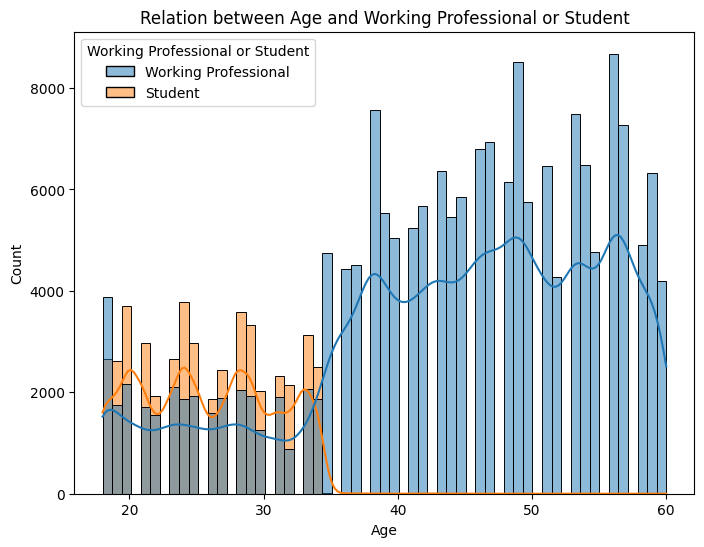

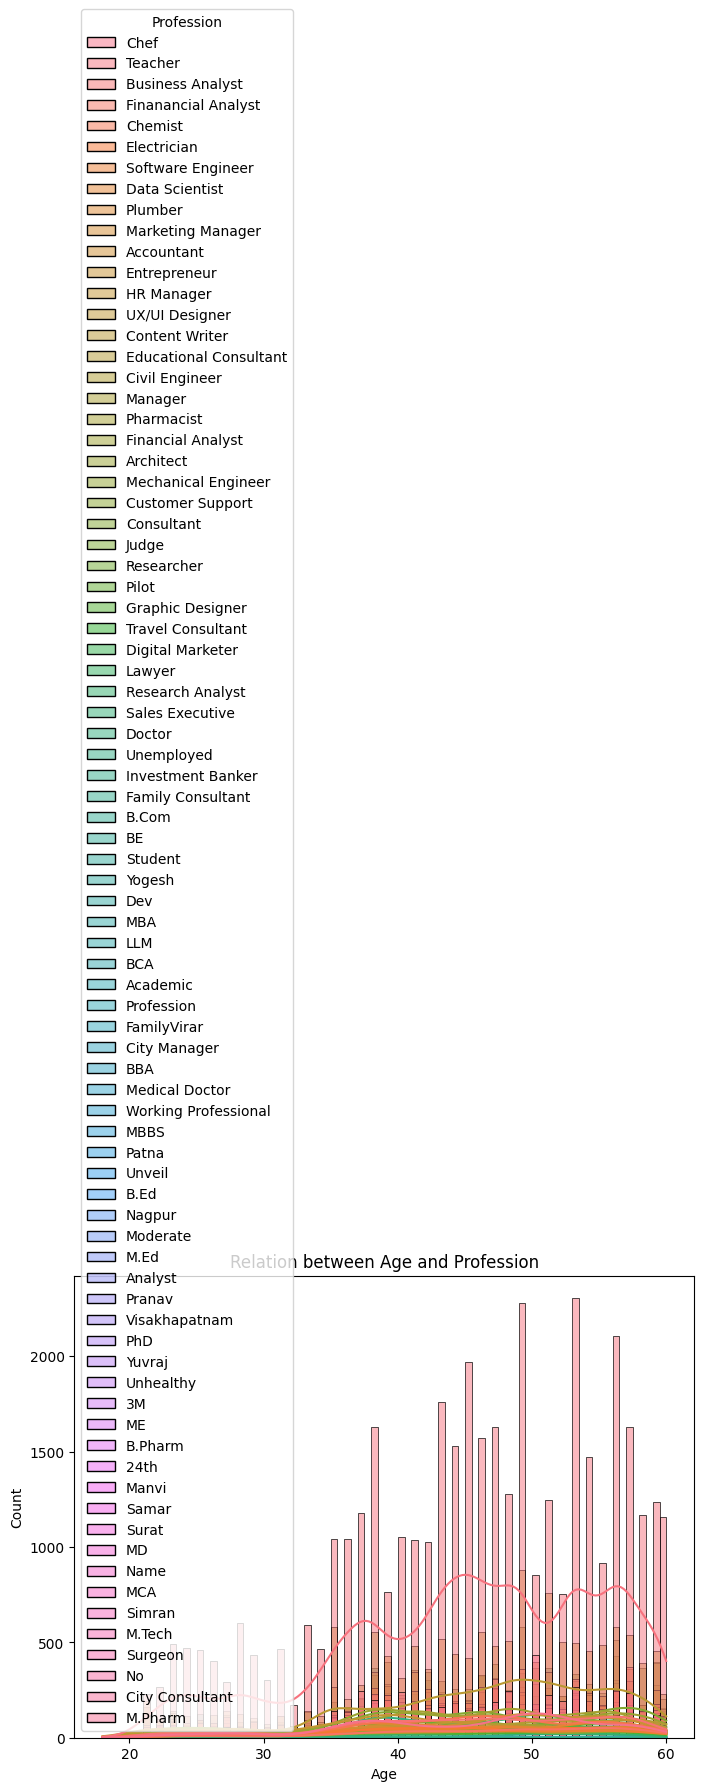

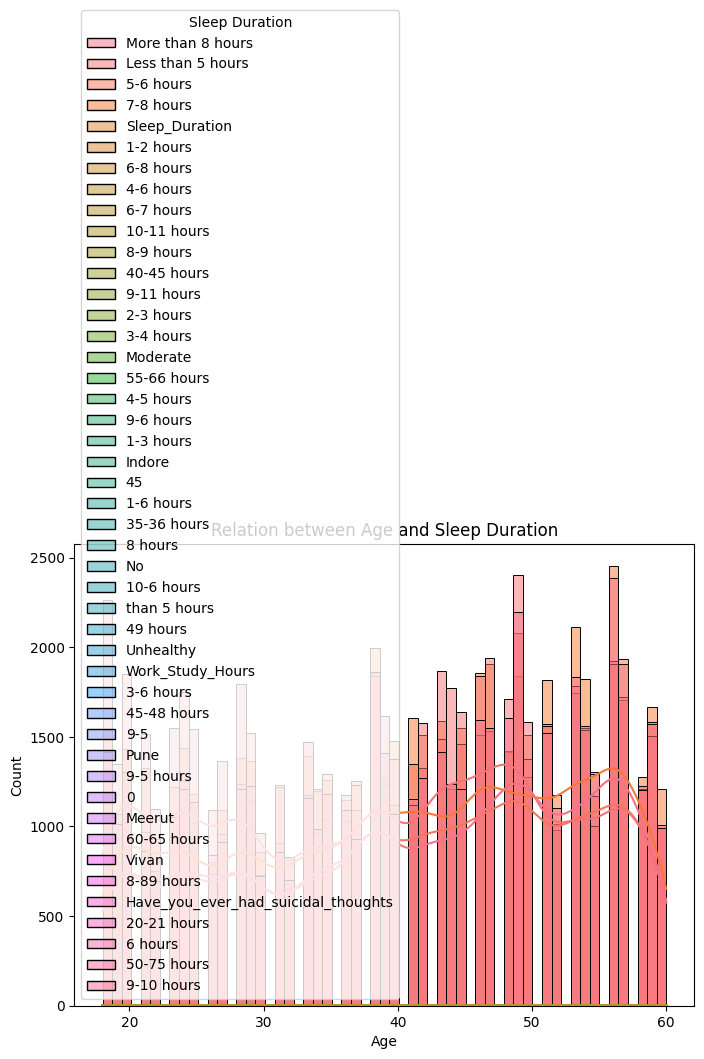

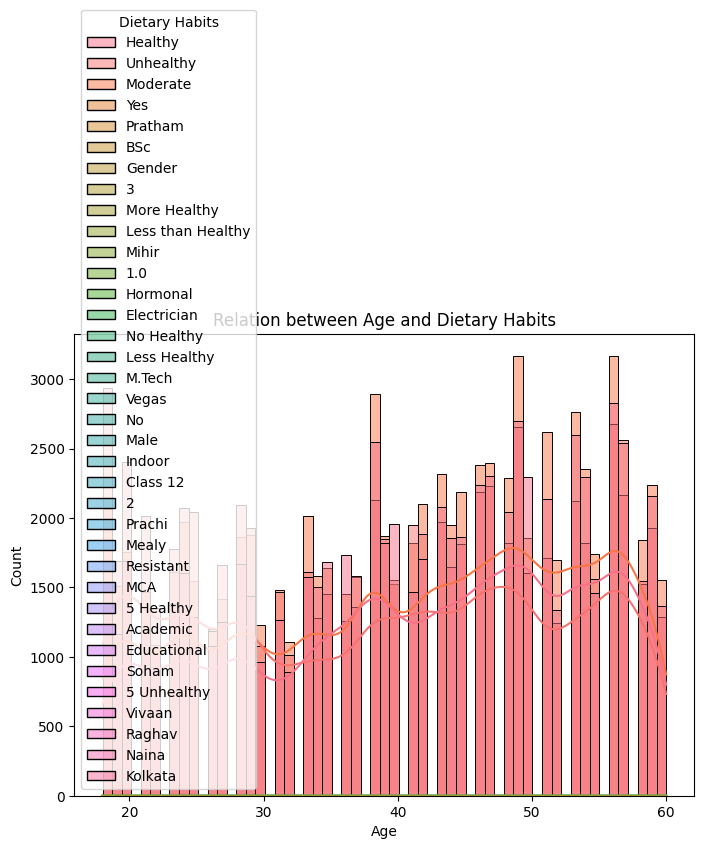

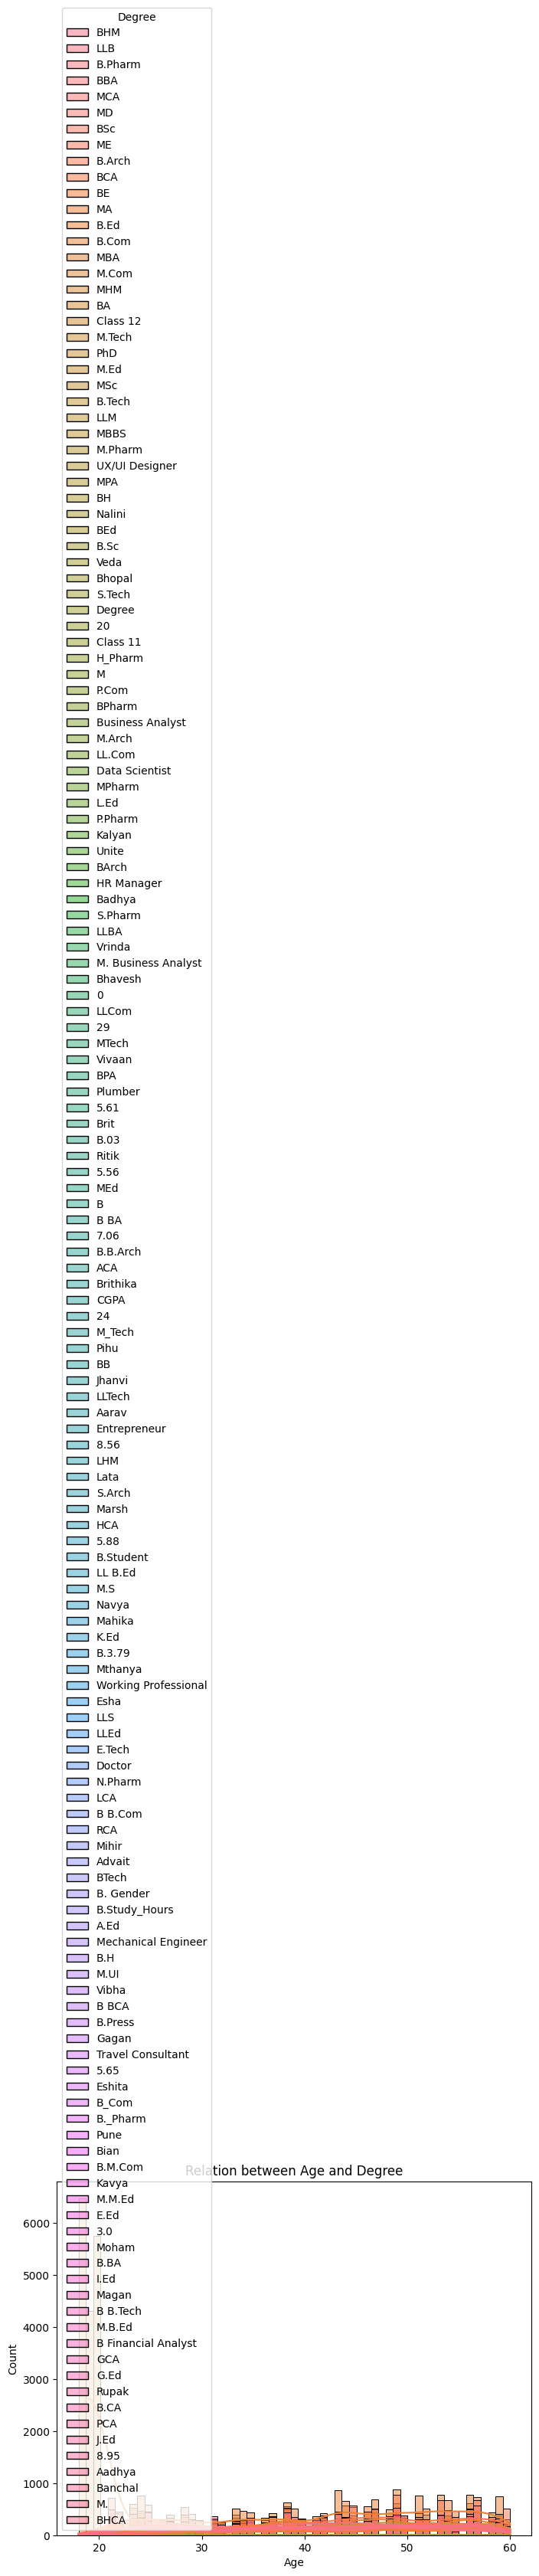

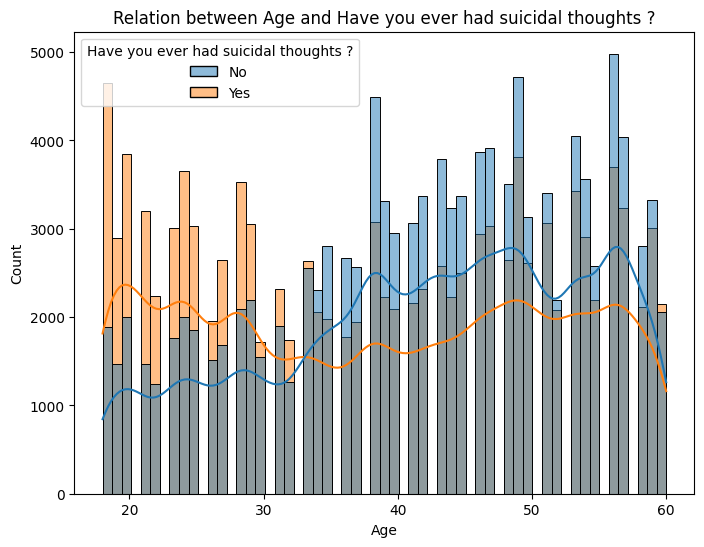

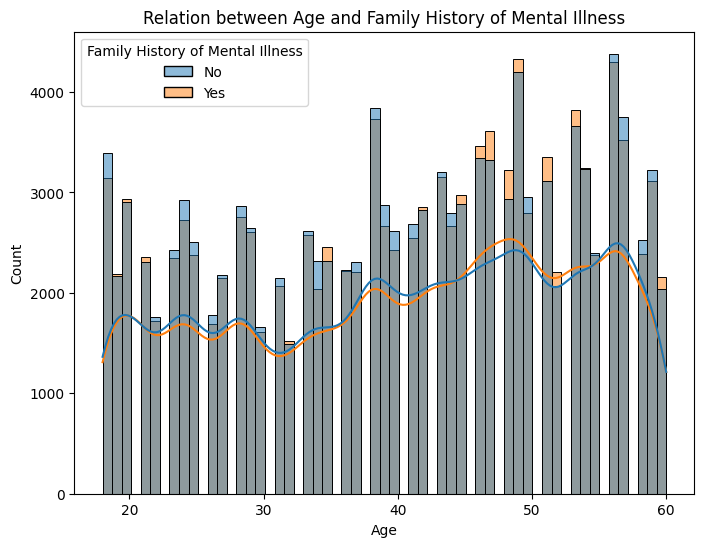

In [ ]:
# distibution of age with all object column
for col in ObjectColumn:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df,x='Age',hue=col,kde=True)
    plt.title(f'Relation between Age and {col}')
    plt.show()

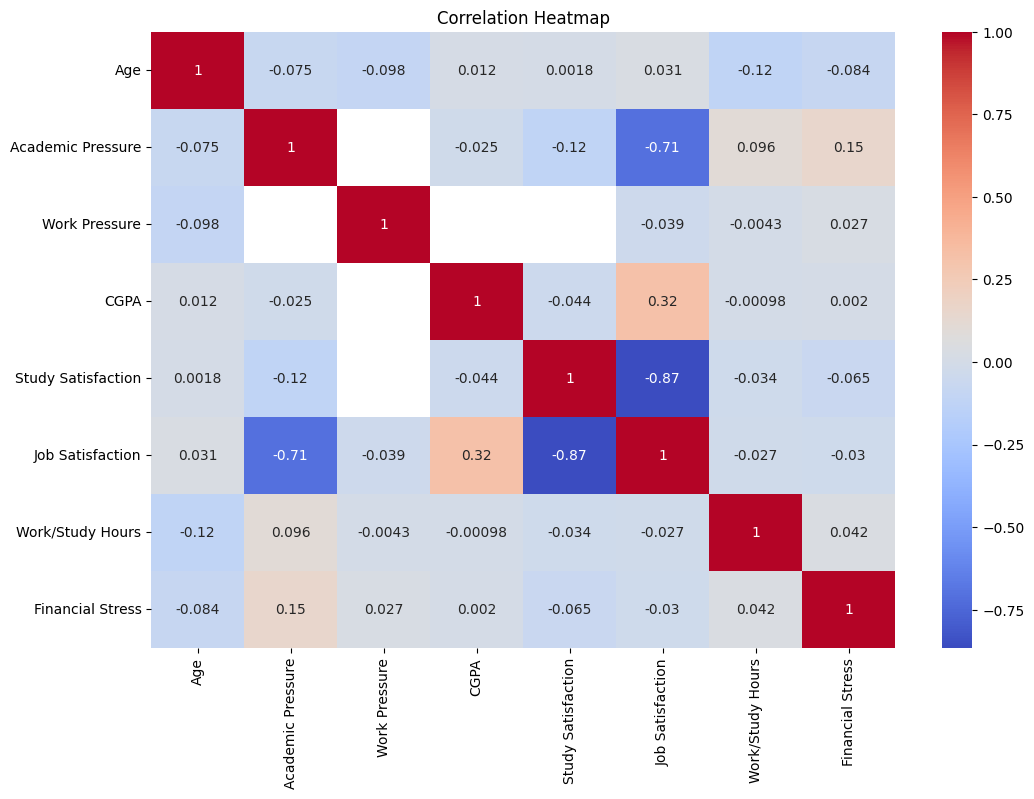

In [ ]:
# coorelation between numerical_feat
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


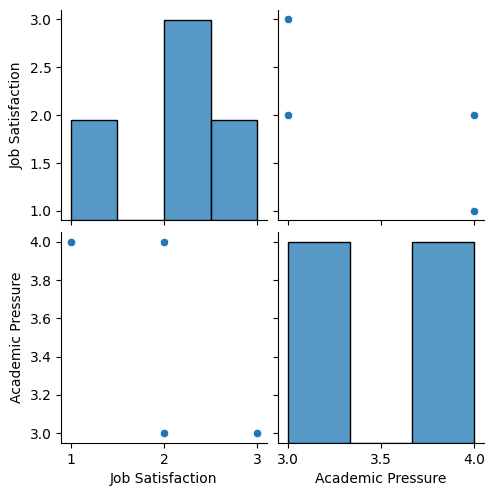

In [ ]:
df4=df[['Job Satisfaction','Academic Pressure']]
df4.dropna(axis=0,inplace=True)
sns.pairplot(df4)

Tsy dia lineairement cooreler le numer

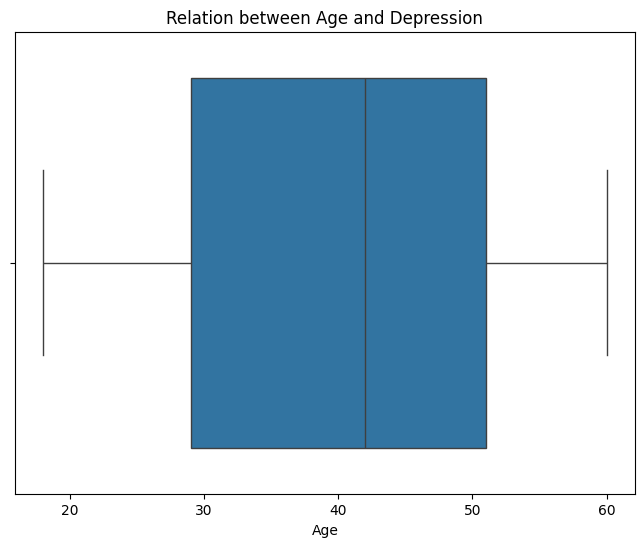

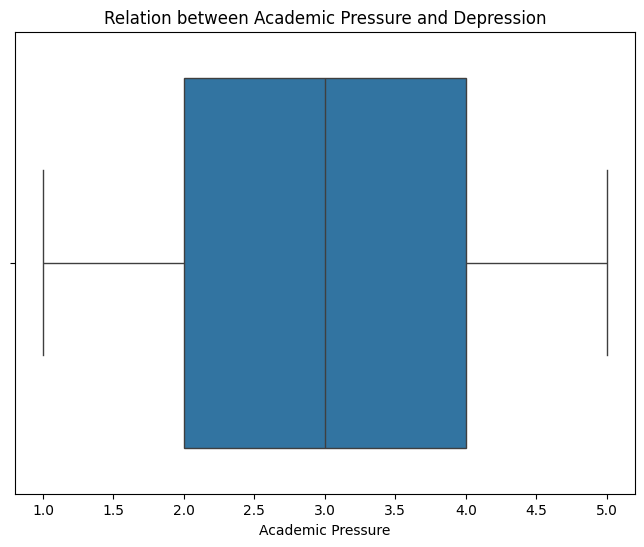

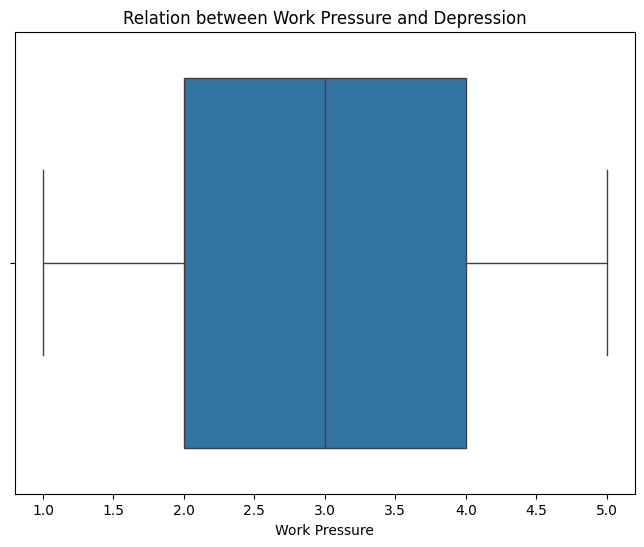

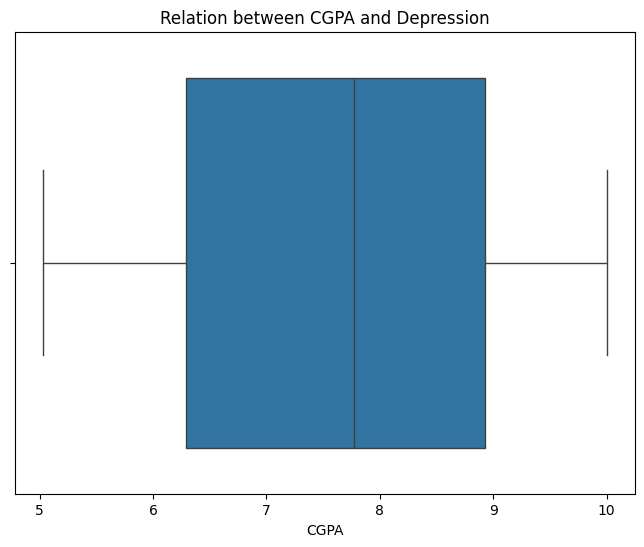

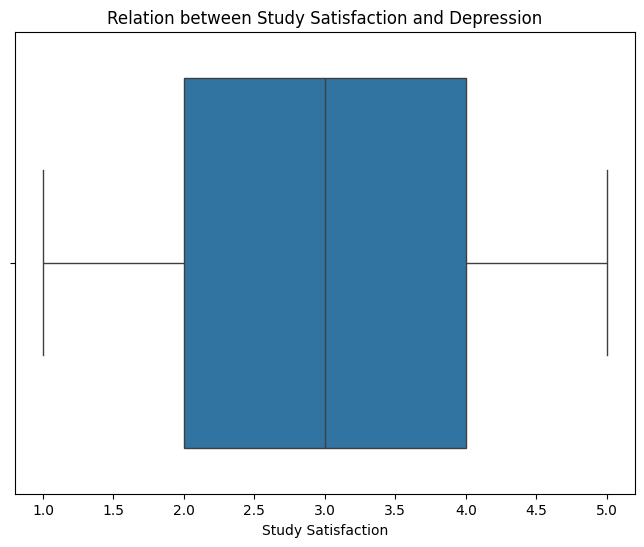

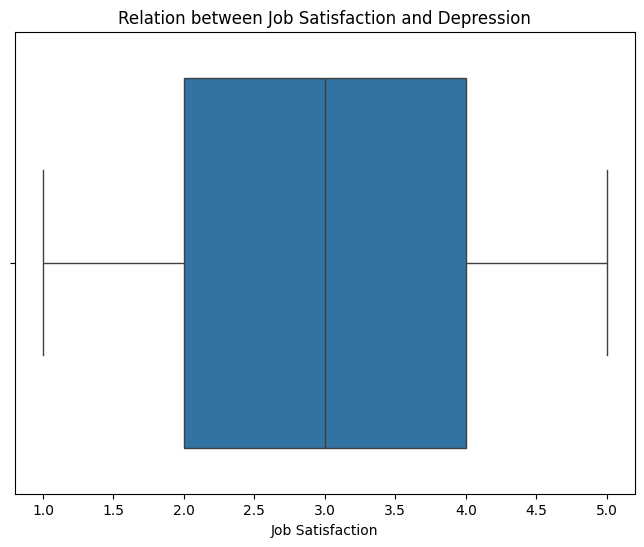

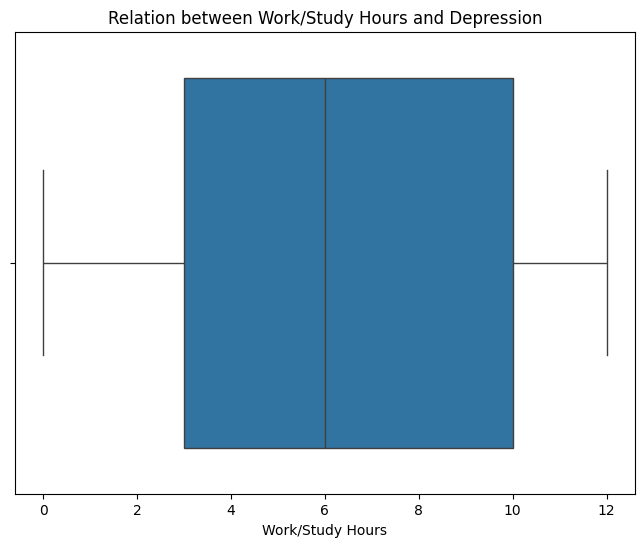

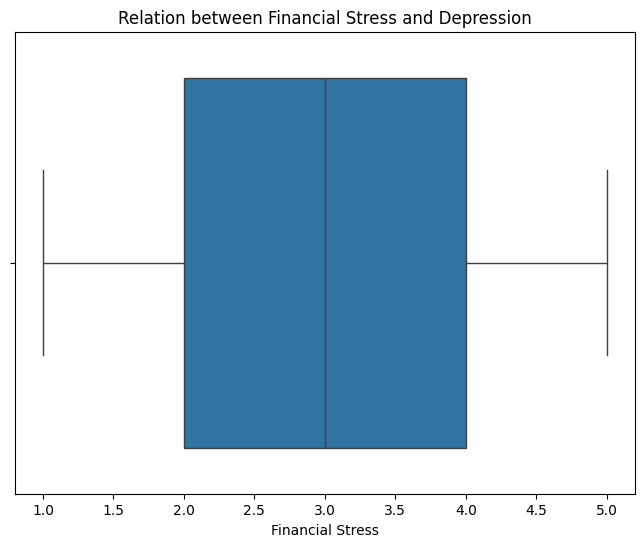

In [ ]:
# detect ouliers
for col in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x=col)
    plt.title(f'Relation between {col} and Depression')
    plt.show()


## DATA PREPROCESSING

In [ ]:
df

,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Female,49.0,Ludhiana,Working Professional,Chef,NaN,5.0,NaN,NaN,2.0,More than 8 hours,Healthy,BHM,No,1.0,2.0,No,0.0
1,Male,26.0,Varanasi,Working Professional,Teacher,NaN,4.0,NaN,NaN,3.0,Less than 5 hours,Unhealthy,LLB,Yes,7.0,3.0,No,1.0
2,Male,33.0,Visakhapatnam,Student,NaN,5.0,NaN,8.97,2.0,NaN,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1.0
3,Male,22.0,Mumbai,Working Professional,Teacher,NaN,5.0,NaN,NaN,1.0,Less than 5 hours,Moderate,BBA,Yes,10.0,1.0,Yes,1.0
4,Female,30.0,Kanpur,Working Professional,Business Analyst,NaN,1.0,NaN,NaN,1.0,5-6 hours,Unhealthy,BBA,Yes,9.0,4.0,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,Female,49.0,Jaipur,Working Professional,Pilot,NaN,3.0,NaN,NaN,5.0,Less than 5 hours,Moderate,BSc,Yes,2.0,2.0,Yes,NaN
234496,Male,29.0,Ahmedabad,Working Professional,Pilot,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,Yes,11.0,3.0,Yes,NaN
234497,Male,24.0,Visakhapatnam,Student,NaN,1.0,NaN,7.51,4.0,NaN,7-8 hours,Moderate,B.Tech,No,7.0,1.0,No,NaN
234498,Female,23.0,Kalyan,Working Professional,Marketing Manager,NaN,4.0,NaN,NaN,2.0,5-6 hours,Healthy,BA,Yes,7.0,5.0,Yes,NaN


In [ ]:
# drop column CGPA , Study Satisfaction , Academic Pressure
df=df.drop(['CGPA','Study Satisfaction','Academic Pressure','City'],axis=1)

In [ ]:

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Working Professional or Student'] = df['Working Professional or Student'].map({'Working Professional': 0, 'Student': 1})
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df

,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,49.0,0,Chef,5.0,2.0,More than 8 hours,Healthy,BHM,0,1.0,2.0,No,0.0
1,0,26.0,0,Teacher,4.0,3.0,Less than 5 hours,Unhealthy,LLB,1,7.0,3.0,No,1.0
2,0,33.0,1,NaN,NaN,NaN,5-6 hours,Healthy,B.Pharm,1,3.0,1.0,No,1.0
3,0,22.0,0,Teacher,5.0,1.0,Less than 5 hours,Moderate,BBA,1,10.0,1.0,Yes,1.0
4,1,30.0,0,Business Analyst,1.0,1.0,5-6 hours,Unhealthy,BBA,1,9.0,4.0,Yes,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,1,49.0,0,Pilot,3.0,5.0,Less than 5 hours,Moderate,BSc,1,2.0,2.0,Yes,NaN
234496,0,29.0,0,Pilot,5.0,1.0,7-8 hours,Moderate,BE,1,11.0,3.0,Yes,NaN
234497,0,24.0,1,NaN,NaN,NaN,7-8 hours,Moderate,B.Tech,0,7.0,1.0,No,NaN
234498,1,23.0,0,Marketing Manager,4.0,2.0,5-6 hours,Healthy,BA,1,7.0,5.0,Yes,NaN


In [ ]:
df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})


In [ ]:
## value count for column as values is object values
columnObj=df.select_dtypes(include=['object']).columns

In [ ]:
print(columnObj)

Index(['Profession', 'Sleep Duration', 'Dietary Habits', 'Degree'], dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for col in columnObj:
    df[col]=le.fit_transform(df[col])
df

,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,49.0,0,13,5.0,2.0,38,11,50,NaN,1.0,2.0,0,0.0
1,0,26.0,0,71,4.0,3.0,35,32,92,NaN,7.0,3.0,0,1.0
2,0,33.0,1,81,NaN,NaN,17,11,34,NaN,3.0,1.0,0,1.0
3,0,22.0,0,71,5.0,1.0,35,22,44,NaN,10.0,1.0,1,1.0
4,1,30.0,0,12,1.0,1.0,17,32,44,NaN,9.0,4.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234495,1,49.0,0,58,3.0,5.0,35,22,53,NaN,2.0,2.0,1,NaN
234496,0,29.0,0,58,5.0,1.0,24,22,46,NaN,11.0,3.0,1,NaN
234497,0,24.0,1,81,NaN,NaN,24,22,39,NaN,7.0,1.0,0,NaN
234498,1,23.0,0,48,4.0,2.0,17,11,41,NaN,7.0,5.0,1,NaN


In [ ]:
df1=df

In [ ]:
def preprocess_dataTrain(df):
  #drop column
  df=df.drop(['id'],axis=1)
  df=df.drop(['CGPA','Study Satisfaction','Academic Pressure','City'],axis=1)
  # encoding
  df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
  df['Working Professional or Student'] = df['Working Professional or Student'].map({'Working Professional': 0, 'Student': 1})
  df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
  df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
  columnObj=df.select_dtypes(include=['object']).columns
  le=LabelEncoder()
  for col in columnObj:
    df[col]=le.fit_transform(df[col])
  #fillna() with 0
  df.dropna(axis=0,inplace=True)
  # scaling
  from sklearn.preprocessing import MinMaxScaler
  scaler=MinMaxScaler()
  df[['Age','Work/Study Hours','Financial Stress']]=scaler.fit_transform(df[['Age','Work/Study Hours','Financial Stress']])
  return df

In [ ]:
def preprocess_data(df):
  #drop column
  df=df.drop(['id'],axis=1)
  df=df.drop(['CGPA','Study Satisfaction','Academic Pressure','City'],axis=1)
  # encoding
  df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
  df['Working Professional or Student'] = df['Working Professional or Student'].map({'Working Professional': 0, 'Student': 1})
  df['Have you ever had suicidal thoughts ?'] = df['Have you ever had suicidal thoughts ?'].map({'Yes': 1, 'No': 0})
  df['Family History of Mental Illness'] = df['Family History of Mental Illness'].map({'Yes': 1, 'No': 0})
  columnObj=df.select_dtypes(include=['object']).columns
  le=LabelEncoder()
  for col in columnObj:
    df[col]=le.fit_transform(df[col])
  #fillna() with 0
  df.fillna(0,inplace=True)
  # scaling
  from sklearn.preprocessing import MinMaxScaler
  scaler=MinMaxScaler()
  df[['Age','Work/Study Hours','Financial Stress']]=scaler.fit_transform(df[['Age','Work/Study Hours','Financial Stress']])
  return df

In [ ]:
Testset=preprocess_data(dataTest)
Testset

,Name,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,288,0,0.833333,0,27,2.0,5.0,25,12,53,0,0.750000,0.50,1
1,279,1,0.952381,0,19,2.0,4.0,25,12,16,0,0.500000,0.75,0
2,365,0,0.833333,0,56,4.0,1.0,16,12,12,1,1.000000,0.75,0
3,191,1,0.119048,1,64,0.0,0.0,27,12,35,1,0.833333,0.75,0
4,285,0,0.690476,0,56,5.0,5.0,16,12,28,1,0.250000,0.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93795,372,1,0.738095,0,44,3.0,5.0,25,12,35,1,0.166667,0.25,1
93796,292,0,0.261905,0,44,5.0,1.0,16,12,29,1,0.916667,0.50,1
93797,252,0,0.142857,1,64,0.0,0.0,16,12,23,0,0.583333,0.00,0
93798,102,1,0.119048,0,38,4.0,2.0,11,5,25,1,0.583333,1.00,1


In [ ]:
Trainset=preprocess_dataTrain(dataTrain)
Trainset

,Name,Gender,Age,Working Professional or Student,Profession,Work Pressure,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,11,1,0.738095,0,10,5.0,2.0,29,7,33,0,0.083333,0.25,0,0
1,407,0,0.190476,0,55,4.0,3.0,27,20,63,1,0.583333,0.50,0,1
3,417,0,0.095238,0,55,5.0,1.0,27,15,28,1,0.833333,0.00,1,1
4,286,1,0.285714,0,9,1.0,1.0,15,20,28,1,0.750000,0.75,1,0
5,383,1,0.976190,0,26,2.0,5.0,15,7,82,0,0.583333,1.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140694,143,1,0.642857,0,55,2.0,5.0,27,15,20,1,0.083333,1.00,0,0
140695,398,1,0.000000,0,64,5.0,4.0,15,20,45,0,0.166667,0.75,1,1
140696,193,1,0.547619,0,15,5.0,4.0,19,15,24,1,0.500000,1.00,1,0
140697,7,1,0.142857,0,38,3.0,1.0,29,15,19,0,0.333333,0.75,0,0


In [ ]:
# Features and target for Trainset and Testset
#split Trainset into Trainset and Testset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Trainset.drop('Depression', axis=1), Trainset['Depression'], test_size=0.2, random_state=42)

In [ ]:
Testset.shape

(93800, 15)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

model=[DecisionTreeClassifier(),RandomForestClassifier(),LogisticRegression(),SVC(),KNeighborsClassifier(),GaussianNB()]

In [ ]:
## Evaluation
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.model_selection import learning_curve
def evaluation(model,X_train,y_train,X_test,y_test):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='f1')
  plt.figure(figsize=(10, 6))
  plt.plot(N, train_score.mean(axis=1), label='Training score')
  plt.plot(N, val_score.mean(axis=1), label='Validation score')
  plt.xlabel('Training examples')
  plt.ylabel('F1 score')
  plt.title('Learning Curve')
  plt.legend()
  plt.show()
  print(f1_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))


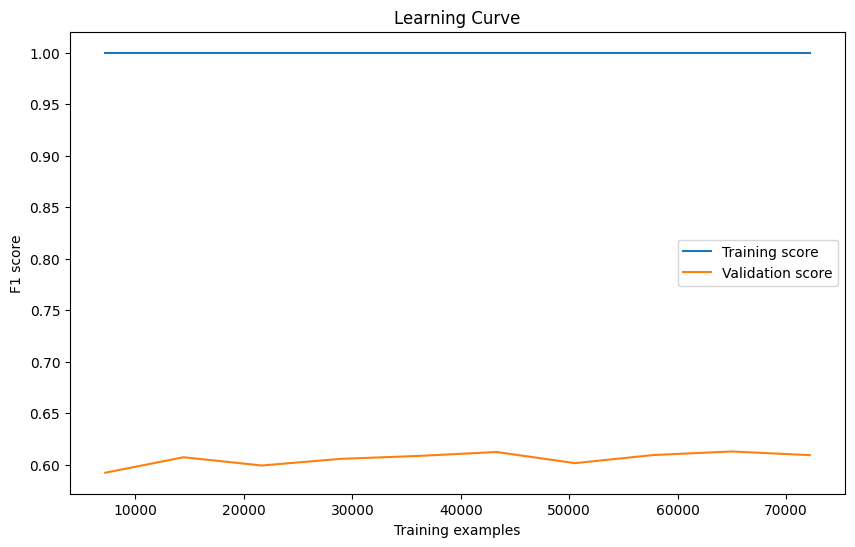

0.6232412714955706
[[19914   809]
 [  637  1196]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     20723
           1       0.60      0.65      0.62      1833

    accuracy                           0.94     22556
   macro avg       0.78      0.81      0.79     22556
weighted avg       0.94      0.94      0.94     22556



In [ ]:
evaluation(model[0],X_train,y_train,X_test,y_test)

In [ ]:
!pip install catboost

In [ ]:
!pip install tensorflow

In [ ]:
# building sequential neural network with keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
## normalize all continuos variable in X_train
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train[['Age','Work/Study Hours','Financial Stress']]=scaler.fit_transform(X_train[['Age','Work/Study Hours','Financial Stress']])

In [ ]:
from tensorflow.keras import callbacks
early_stopping = callbacks.EarlyStopping(
    min_delta=0.001,
    patience=2,
    restore_best_weights=True,
)

In [ ]:
nn2=Sequential()
nn2.add(Dense(128,activation='relu',input_dim=X_train.shape[1]))
nn2.add(Dense(64,activation='relu'))
nn2.add(Dense(1,activation='sigmoid'))
nn2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
nn2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,369 (40.50 KB)

 Trainable params: 10,369 (40.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history=nn2.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test),callbacks=[early_stopping])

Epoch 1/50
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9129 - loss: 0.3197 - val_accuracy: 0.9376 - val_loss: 0.2080
Epoch 2/50
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.9478 - loss: 0.1480 - val_accuracy: 0.9573 - val_loss: 0.1151
Epoch 3/50
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9494 - loss: 0.1372 - val_accuracy: 0.9569 - val_loss: 0.1149
Epoch 4/50
2820/2820 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9535 - loss: 0.1259 - val_accuracy: 0.9547 - val_loss: 0.1223


In [ ]:
# watching l2oss courbe
plt.plot(nn2.history.history['loss'])
plt.plot(nn2.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# print score
nn2.evaluate(X_test,y_test)

705/705 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9549 - loss: 0.1200


[0.11505483090877533, 0.9573062658309937]

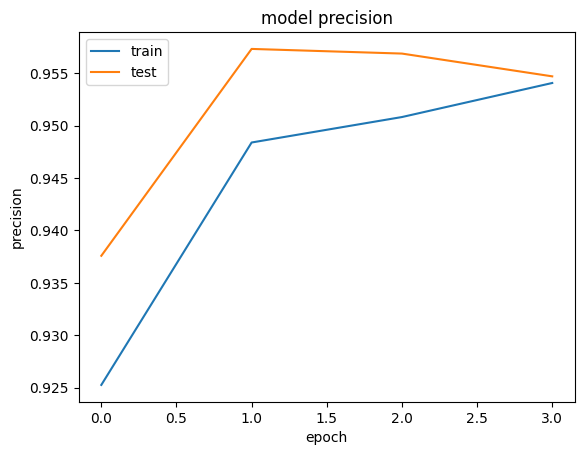

In [ ]:
## plot score
plt.plot(history.history['accuracy']) # Use history variable here
plt.plot(history.history['val_accuracy']) # Use history variable here
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left') # Add a legend for better readability
plt.show() # Display the plot

In [ ]:
## add prediction with nn2 into Testset
y_pred_nn2=nn2.predict(Testset)
# putting into file submission.csv with id column
y_pred_nn2=np.where(y_pred_nn2>0.5,1,0)
## do the index since 140700
Testset.index=range(140700,140700+len(y_pred_nn2))
submission=pd.DataFrame({'id':Testset.index,'Depression':y_pred_nn2.flatten()})
submission.to_csv('submission.csv',index=False)

2932/2932 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step


In [ ]:
pd.read_csv('submission.csv')

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
...,...,...
93795,234495,0
93796,234496,1
93797,234497,0
93798,234498,1


In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier

   # Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

   # Bagging with Decision Tree
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# AdaBoost with Decision Tree
adaboost_model = AdaBoostClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(), random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

      # Example with Random Forest
param_grid = {
          'n_estimators': [50, 100, 200],
          'max_depth': [None, 10, 20],
      }
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)
best_rf_model = grid_search.best_estimator_

In [ ]:
## bestmodel for adaboost
# Define the parameter grid for AdaBoost and its base estimator
param_grid = {
    'n_estimators': [50, 100, 200],  # AdaBoost parameter
    'estimator__max_depth': [None, 10, 20],  # Base estimator parameter
}

# Perform grid search
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Get the best model
best_adaB_model = grid_search.best_estimator_

KeyboardInterrupt: 

In [ ]:
y_pred_rf = best_rf_model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

0.9604096471005498
[[20461   262]
 [  631  1202]]


## prediction with X_test and y_test
y_pred_rf = best_rf_model.predict(X_test)
# score and matrix confusion
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print(accuracy_score(y_test,y_pred_rf))
print(confusion_matrix(y_test,y_pred_rf))

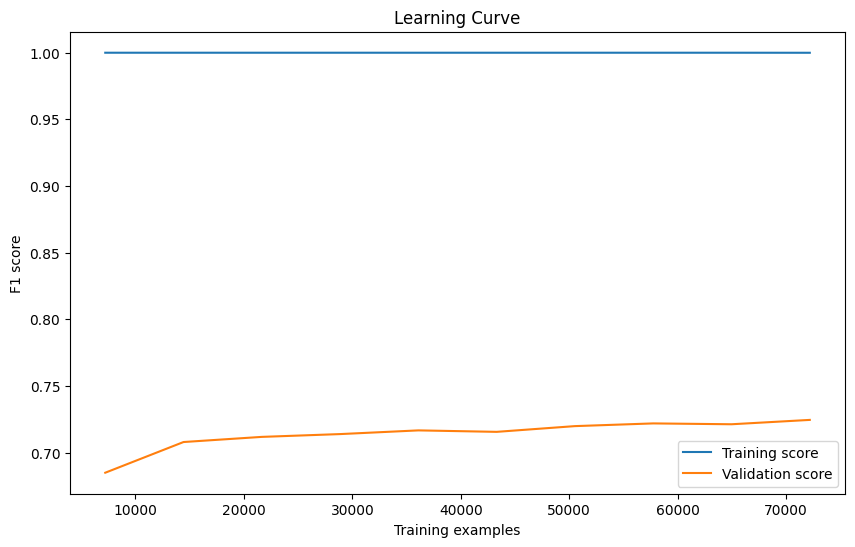

In [ ]:
## learning curve with best_rf_model
from sklearn.model_selection import learning_curve
N, train_score, val_score = learning_curve(best_rf_model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='f1')
plt.figure(figsize=(10, 6))
plt.plot(N, train_score.mean(axis=1), label='Training score')
plt.plot(N, val_score.mean(axis=1), label='Validation score')
plt.xlabel('Training examples')
plt.ylabel('F1 score')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [ ]:
## add predictionbes with best_rf_model into Testset
y_pred_rf=best_rf_model.predict(Testset)
Testset.index=range(140700,140700+len(y_pred_rf))
submission=pd.DataFrame({'id':Testset.index,'Depression':y_pred_rf.flatten()})
submission.to_csv('submission.csv',index=False)

In [ ]:
data2=pd.read_csv('submission.csv')
data2.head(10)

,id,Depression
0,140700,0
1,140701,0
2,140702,0
3,140703,1
4,140704,0
5,140705,0
6,140706,0
7,140707,0
8,140708,0
9,140709,1


In [ ]:
## save the model
import pickle
pickle.dump(best_rf_model,open('model.pkl','wb'))

In [ ]:
## load model.pkl
model=pickle.load(open('model.pkl','rb'))


In [ ]:
y_pred_adb = best_adaB_model.predict(X_test)

print(accuracy_score(y_test,y_pred_adb))
print(confusion_matrix(y_test,y_pred_adb))

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
!pip install catBoost

In [ ]:
## Build model with catBoost
from catboost import CatBoostClassifier
modelCat=CatBoostClassifier()
modelCat.fit(X_train,y_train)
y_pred_cat=modelCat.predict(X_test)

Learning rate set to 0.070445
0:	learn: 0.5508474	total: 156ms	remaining: 2m 35s
1:	learn: 0.4511886	total: 207ms	remaining: 1m 43s
2:	learn: 0.3734448	total: 237ms	remaining: 1m 18s
3:	learn: 0.3161267	total: 265ms	remaining: 1m 5s
4:	learn: 0.2713267	total: 327ms	remaining: 1m 5s
5:	learn: 0.2386447	total: 413ms	remaining: 1m 8s
6:	learn: 0.2138082	total: 444ms	remaining: 1m 2s
7:	learn: 0.1943697	total: 481ms	remaining: 59.6s
8:	learn: 0.1801737	total: 516ms	remaining: 56.8s
9:	learn: 0.1685218	total: 545ms	remaining: 54s
10:	learn: 0.1587767	total: 572ms	remaining: 51.5s
11:	learn: 0.1506383	total: 624ms	remaining: 51.4s
12:	learn: 0.1441846	total: 689ms	remaining: 52.3s
13:	learn: 0.1391791	total: 750ms	remaining: 52.8s
14:	learn: 0.1353645	total: 809ms	remaining: 53.1s
15:	learn: 0.1319088	total: 885ms	remaining: 54.4s
16:	learn: 0.1282691	total: 951ms	remaining: 55s
17:	learn: 0.1254162	total: 979ms	remaining: 53.4s
18:	learn: 0.1235183	total: 1.06s	remaining: 54.8s
19:	learn: 0

In [ ]:
## Evaluation for catboost
print(accuracy_score(y_test,y_pred_cat))
print(confusion_matrix(y_test,y_pred_cat))

0.9621386770704026
[[20420   303]
 [  551  1282]]


In [ ]:
y_pred_cat=modelCat.predict(Testset)
y_pred_cat

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:

param_grid = {
    'iterations': [200, 500, 1000],  # Plus d'itérations pour des modèles plus robustes
    'learning_rate': [0.01, 0.03, 0.1],  # Exploration plus fine des taux d'apprentissage
    'depth': [4, 6, 10],  # Profondeurs classiques pour équilibrer biais et variance
    'l2_leaf_reg': [1, 3, 10],  # Plus large plage pour la régularisation
    'border_count': [32, 64, 128],  # Nombre de points pour les seuils de binarisation
    'bagging_temperature': [0.0, 1.0, 3.0],  # Paramètre spécifique à CatBoost pour le boosting
    'random_strength': [1, 5, 10]  # Impact des poids aléatoires sur le boosting
}
grid_search = GridSearchCV(estimator=modelCat, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

best_cat_model = grid_search.best_estimator_

In [ ]:
y_pred_nn2=best_rf_model.predict(Testset)
# putting into file submission.csv with id column
y_pred_nn2=np.where(y_pred_nn2>0.5,1,0)
## do the index since 140700
Testset.index=range(140700,140700+len(y_pred_nn2))
submission=pd.DataFrame({'id':Testset.index,'Depression':y_pred_nn2.flatten()})
submission.to_csv('submission.csv',index=False)

In [ ]:
Testset.index=range(140700,140700+len(y_pred_cat))
submission=pd.DataFrame({'id':Testset.index,'Depression':y_pred_cat})
submission.to_csv('submission.csv',index=False)

In [ ]:
!pip install xgboost

In [ ]:
## building xgboost model
from xgboost import XGBClassifier
modelXGB=XGBClassifier()
modelXGB.fit(X_train,y_train)
y_pred_xgb=modelXGB.predict(X_test)

In [ ]:
## evalution with accuracy and confusion matrix
print(accuracy_score(y_test,y_pred_xgb))
print(confusion_matrix(y_test,y_pred_xgb))

0.9611189927292073
[[20389   334]
 [  543  1290]]


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def objective2(trial):

    params = {
        # "device_type": trial.suggest_categorical("device_type", ['gpu']),
        "n_estimators": trial.suggest_int("n_estimators", 100,500,step=10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "max_depth": trial.suggest_int("max_depth", 1, 20),
        "min_child_weight": trial.suggest_int("min_child_weight", 1, 10),
        "subsample": trial.suggest_float("subsample", 0.5, 1),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1),
        "colsample_bynode": trial.suggest_float("colsample_bynode", 0.5, 1),
        "colsample_bylevel": trial.suggest_float("colsample_bylevel", 0.5, 1),
        "reg_lambda": trial.suggest_float("reg_lambda", 10e-7, 10),
        "reg_alpha": trial.suggest_float("reg_alpha", 0,1),
         }


    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    acc = accuracy_score(y_test, predictions)
    return acc

In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.1 MB/s eta 0:00:00


In [ ]:
import optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective2, n_trials=10)

[I 2024-11-25 19:20:47,572] A new study created in memory with name: no-name-06195811-aa2e-46f0-ad02-27f7d03bf4f3
[I 2024-11-25 19:21:12,668] Trial 0 finished with value: 0.9607643199148785 and parameters: {'n_estimators': 110, 'learning_rate': 0.16752793591680495, 'max_depth': 11, 'min_child_weight': 8, 'subsample': 0.8412554809199575, 'colsample_bytree': 0.8149668521149764, 'colsample_bynode': 0.6479097767272515, 'colsample_bylevel': 0.8639772098364744, 'reg_lambda': 0.5966155829007912, 'reg_alpha': 0.4314210798016185}. Best is trial 0 with value: 0.9607643199148785.
[I 2024-11-25 19:21:19,301] Trial 1 finished with value: 0.9593456286575633 and parameters: {'n_estimators': 130, 'learning_rate': 0.021898117247184448, 'max_depth': 13, 'min_child_weight': 3, 'subsample': 0.8175290241724714, 'colsample_bytree': 0.6463056168015554, 'colsample_bynode': 0.7651586825279955, 'colsample_bylevel': 0.6536668810995799, 'reg_lambda': 4.1426656697478075, 'reg_alpha': 0.7254989856040354}. Best is t

In [ ]:
study.best_params

{'n_estimators': 320,
 'learning_rate': 0.11319945548987101,
 'max_depth': 5,
 'min_child_weight': 2,
 'subsample': 0.7937079981048104,
 'colsample_bytree': 0.9344413676178753,
 'colsample_bynode': 0.6477149425646445,
 'colsample_bylevel': 0.6569975835904414,
 'reg_lambda': 9.971942243222479,
 'reg_alpha': 0.28503761597175814}

In [ ]:
param={'n_estimators': 320,
 'learning_rate': 0.11319945548987101,
 'max_depth': 5,
 'min_child_weight': 2,
 'subsample': 0.7937079981048104,
 'colsample_bytree': 0.9344413676178753,
 'colsample_bynode': 0.6477149425646445,
 'colsample_bylevel': 0.6569975835904414,
 'reg_lambda': 9.971942243222479,
 'reg_alpha': 0.28503761597175814}
Xmodel = XGBClassifier(**param)
Xmodel.fit(X_train, y_train)
y_pred_xgb = Xmodel.predict(X_test)
print(accuracy_score(y_test, y_pred_xgb))

0.9623160134775669


In [ ]:
## Model test with testSet
y_pred_xgb = Xmodel.predict(Testset)
print(y_pred_xgb)

[0 0 0 ... 0 1 0]


In [ ]:
Testset.index=range(140700,140700+len(y_pred_xgb))
submission=pd.DataFrame({'id':Testset.index,'Depression':y_pred_xgb})
submission.to_csv('submission.csv',index=False)

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.5 MB/s eta 0:00:00


In [ ]:
# prompt: do the same process for catBoost

from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X_train, y_train, X_test, and Testset are defined from the previous code

modelCat = CatBoostClassifier()
modelCat.fit(X_train, y_train)
y_pred_cat = modelCat.predict(X_test)

print(accuracy_score(y_test, y_pred_cat))
print(confusion_matrix(y_test, y_pred_cat))



Learning rate set to 0.070445
0:	learn: 0.5508474	total: 81.4ms	remaining: 1m 21s
1:	learn: 0.4511886	total: 102ms	remaining: 51.1s
2:	learn: 0.3734448	total: 124ms	remaining: 41.1s
3:	learn: 0.3161267	total: 144ms	remaining: 35.9s
4:	learn: 0.2713267	total: 166ms	remaining: 33s
5:	learn: 0.2386447	total: 187ms	remaining: 30.9s
6:	learn: 0.2138082	total: 211ms	remaining: 29.9s
7:	learn: 0.1943697	total: 233ms	remaining: 28.9s
8:	learn: 0.1801737	total: 255ms	remaining: 28.1s
9:	learn: 0.1685218	total: 276ms	remaining: 27.4s
10:	learn: 0.1587767	total: 299ms	remaining: 26.9s
11:	learn: 0.1506383	total: 320ms	remaining: 26.4s
12:	learn: 0.1441846	total: 341ms	remaining: 25.9s
13:	learn: 0.1391791	total: 363ms	remaining: 25.6s
14:	learn: 0.1353645	total: 384ms	remaining: 25.2s
15:	learn: 0.1319088	total: 407ms	remaining: 25s
16:	learn: 0.1282691	total: 431ms	remaining: 24.9s
17:	learn: 0.1254162	total: 454ms	remaining: 24.7s
18:	learn: 0.1235183	total: 475ms	remaining: 24.5s
19:	learn: 0.

In [ ]:
def objective3(trial):
    params = {
        "iterations": trial.suggest_int("iterations", 100, 500, step=10),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
        "depth": trial.suggest_int("depth", 1, 16), # Change the upper bound to 16
        "l2_leaf_reg": trial.suggest_float("l2_leaf_reg", 1e-3, 10.0),
        "border_count": trial.suggest_int("border_count", 1, 255),
        "bagging_temperature": trial.suggest_float("bagging_temperature", 0.0, 1.0),
        "loss_function": "Logloss",
        "eval_metric": "Accuracy",
        "random_seed": 42,
        "logging_level": "Silent",
    }

    # Split the data into training and validation sets
    X_train_opt, X_valid, y_train_opt, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Initialize and train the CatBoostClassifier
    model = CatBoostClassifier(**params)
    model.fit(X_train_opt, y_train_opt, eval_set=(X_valid, y_valid), verbose=0)

    # Predict and calculate the accuracy on the validation set
    y_pred_valid = model.predict(X_valid)
    accuracy = accuracy_score(y_valid, y_pred_valid)

    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective3, n_trials=20)

[I 2024-11-25 19:43:32,430] A new study created in memory with name: no-name-35cd0934-b2c7-47bc-ab3c-86714f13944a
[I 2024-11-25 19:43:42,927] Trial 0 finished with value: 0.9607625803591221 and parameters: {'iterations': 100, 'learning_rate': 0.2858558263454648, 'depth': 11, 'l2_leaf_reg': 1.3708550847145318, 'border_count': 85, 'bagging_temperature': 0.8162677667321152}. Best is trial 0 with value: 0.9607625803591221.
[I 2024-11-25 19:43:49,694] Trial 1 finished with value: 0.958324096652627 and parameters: {'iterations': 130, 'learning_rate': 0.036598918499672624, 'depth': 4, 'l2_leaf_reg': 0.8517643695318361, 'border_count': 16, 'bagging_temperature': 0.9043981579511366}. Best is trial 0 with value: 0.9607625803591221.
[I 2024-11-25 19:44:13,391] Trial 2 finished with value: 0.9596541786743515 and parameters: {'iterations': 470, 'learning_rate': 0.023499078614276726, 'depth': 2, 'l2_leaf_reg': 4.953019606361712, 'border_count': 122, 'bagging_temperature': 0.03922406164125236}. Best 

In [ ]:
## evaluation
best_params = study.best_params
best_model = CatBoostClassifier(**best_params)
best_model.fit(X_train, y_train)
y_pred_cat = best_model.predict(X_test)

0:	learn: 0.3255544	total: 86.9ms	remaining: 30.3s
1:	learn: 0.2094719	total: 171ms	remaining: 29.8s
2:	learn: 0.1649765	total: 231ms	remaining: 26.7s
3:	learn: 0.1417036	total: 307ms	remaining: 26.5s
4:	learn: 0.1304864	total: 372ms	remaining: 25.6s
5:	learn: 0.1231810	total: 423ms	remaining: 24.3s
6:	learn: 0.1187569	total: 488ms	remaining: 23.9s
7:	learn: 0.1159467	total: 554ms	remaining: 23.7s
8:	learn: 0.1125586	total: 621ms	remaining: 23.5s
9:	learn: 0.1103945	total: 682ms	remaining: 23.2s
10:	learn: 0.1092544	total: 730ms	remaining: 22.5s
11:	learn: 0.1082413	total: 787ms	remaining: 22.2s
12:	learn: 0.1073016	total: 834ms	remaining: 21.6s
13:	learn: 0.1067717	total: 881ms	remaining: 21.1s
14:	learn: 0.1059472	total: 941ms	remaining: 21s
15:	learn: 0.1053205	total: 1s	remaining: 20.9s
16:	learn: 0.1048712	total: 1.05s	remaining: 20.5s
17:	learn: 0.1040432	total: 1.1s	remaining: 20.3s
18:	learn: 0.1037617	total: 1.18s	remaining: 20.5s
19:	learn: 0.1035932	total: 1.25s	remaining: 2

In [ ]:
## score and classification report
print(accuracy_score(y_test, y_pred_cat))
print(confusion_matrix(y_test, y_pred_cat))
print(classification_report(y_test, y_pred_cat))

0.9621830111721936
[[20417   306]
 [  547  1286]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     20723
           1       0.81      0.70      0.75      1833

    accuracy                           0.96     22556
   macro avg       0.89      0.84      0.87     22556
weighted avg       0.96      0.96      0.96     22556



In [ ]:
##Test with testSet and store into submission
y_pred_cat = best_model.predict(Testset)
Testset.index=range(140700,140700+len(y_pred_cat))
submission=pd.DataFrame({'id':Testset.index,'Depression':y_pred_cat.flatten()})
submission.to_csv('submission1.csv',index=False)